In [7]:
import numpy as np
import pandas as pd

In [8]:
from collections import defaultdict
import re

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import datetime as dt
import time

In [11]:
df_revenue = pd.read_csv('data/Adventure Park_Revenue Report_200820201334_948152523.csv')

In [12]:
df_revenue.head()

BookingPaymentId  ReceiptNumber PaymentStatus      TransactionDate  \
0            366432         459535    Fully Paid  16 Dec 2019 1:56 AM   
1            366433         459536    Fully Paid  16 Dec 2019 6:02 AM   
2            366433         459536    Fully Paid  16 Dec 2019 6:02 AM   
3            366433         459536    Fully Paid  16 Dec 2019 6:02 AM   
4                 0         459536    Fully Paid  16 Dec 2019 6:02 AM   

  DeviceName  TicketUnitCost TransactionLocation        TicketId  \
0        NaN           17.50     Online checkout  459535-1607914   
1        NaN           85.95     Online checkout  459536-1607915   
2        NaN           85.95     Online checkout  459536-1607916   
3        NaN           85.95     Online checkout  459536-1607917   
4        NaN           85.95     Online checkout  459536-1607915   

                        ParentProductName  ParentProductReportingName  ...  \
0  2019/2020 Christmas Festival of Lights                         NaN  ...   
1        2019/2020 Season Pass Membership                         NaN  ...   
2        2019/2020 Season Pass Membership                         NaN  ...   
3        2019/2020 Season Pass Membership                         NaN  ...   
4        2019/2020 Season Pass Membership                         NaN  ...   

   DeferredRevenueGiftCards DeferredRevenueOther  Discount FeeRevenue  \
0                       0.0                  0.0       0.0     1.3100   
1                       0.0                  0.0       0.0     2.4333   
2                       0.0                  0.0       0.0     2.4333   
3                       0.0                  0.0       0.0     2.4333   
4                       0.0                  0.0       0.0     0.0000   

  AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
0                0.0        18.8100            1.710000    0.000000   
1                0.0        88.3833            8.034845    0.000000   
2                0.0        88.3833            8.034845    0.000000   
3                0.0        88.3833            8.034845    0.000000   
4                0.0         0.0000            0.000000    7.813636   

   NetRevenue  RecognisedDiscount  
0    0.000000                 0.0  
1    0.000000                 0.0  
2    0.000000                 0.0  
3    0.000000                 0.0  
4   78.136364                 0.0  

[5 rows x 43 columns]

In [13]:
df_revenue['TransactionDate'].apply(lambda x : pd.to_datetime(str(x)))

0        2019-12-16 01:56:00
1        2019-12-16 06:02:00
2        2019-12-16 06:02:00
3        2019-12-16 06:02:00
4        2019-12-16 06:02:00
                 ...        
218764   2020-01-12 17:55:00
218765   2020-01-12 17:55:00
218766   2020-01-12 17:57:00
218767   2020-01-12 17:57:00
218768   2020-01-12 18:02:00
Name: TransactionDate, Length: 218769, dtype: datetime64[ns]

In [14]:
df_revenue.columns

Index(['BookingPaymentId', 'ReceiptNumber', 'PaymentStatus', 'TransactionDate',
       'DeviceName', 'TicketUnitCost', 'TransactionLocation', 'TicketId',
       'ParentProductName', 'ParentProductReportingName', 'ProductId',
       'ProductName', 'ProductReportingName', 'PaymentType',
       'PaymentGatewayId', 'TicketTransactionValue', 'CreditCardFeeAmount',
       'TransactionFeeAmount', 'ProductBookingFeeAmount',
       'BookingModifierAmount', 'DiscountCodeUsed', 'RedemptionDate',
       'RedemptionDeviceName', 'TaxPercent', 'GLCode', 'ExpiryDate',
       'EventDate', 'EntryType', 'IsTransaction', 'IsRedemption',
       'IsExpiration', 'DeferredRevenue', 'RecognisedProductCost',
       'DeferredRevenueGiftCards', 'DeferredRevenueOther', 'Discount',
       'FeeRevenue', 'AccountsReceivable', 'FundsReceived',
       'TaxOnFundsReceived', 'TaxPayable', 'NetRevenue', 'RecognisedDiscount'],
      dtype='object')

In [15]:
cols = ['BookingPaymentId', 'ReceiptNumber', 'TicketId', 'PaymentStatus', 'TransactionDate', 'RedemptionDate',
       'DeviceName', 'TicketUnitCost', 
       'ParentProductName',
       'EventDate', 'EntryType', 'TransactionLocation', 'IsTransaction', 'IsRedemption',
       'IsExpiration', 'DeferredRevenue', 'Discount',
       'FeeRevenue', 'AccountsReceivable', 'FundsReceived',
       'TaxOnFundsReceived', 'TaxPayable', 'NetRevenue']

In [16]:
#set(df_revenue['ParentProductName'])

In [17]:
df_attn = pd.read_csv('data/Adventure Park_Attendance_200820201416_1239014084.csv')

In [18]:
df_attn.head()

Booking ID                       Booking Name  \
0      375517                      CSIRO 2018/19   
1      375517                      CSIRO 2018/19   
2      378656                   michelle stewart   
3      382992  Qenos Pty Ltd Social Club 2019/20   
4      382992  Qenos Pty Ltd Social Club 2019/20   

                            Email  Booking Amount  Redemptions Count  \
0     brenda.vanderheide@csiro.au         5917.50                  1   
1     brenda.vanderheide@csiro.au         5917.50                  1   
2  michelle.b.stewart@outlook.com          426.05                  1   
3           Sue.Colling@qenos.com        18802.00                  1   
4           Sue.Colling@qenos.com        18802.00                  1   

           Checkin Time       Ticket ID  \
0  19 Dec 2019 10:19 AM  375517-1278863   
1  19 Dec 2019 10:19 AM  375517-1278862   
2  26 Dec 2019 11:25 AM  378656-1301221   
3   18 Dec 2019 3:33 PM  382992-1499142   
4   18 Dec 2019 3:33 PM  382992-1499148   

                                        Product Name  \
0  2018/2019 Bulk Tickets - General Admission (30...   
1  2018/2019 Bulk Tickets - General Admission (30...   
2  2018/2019 Season Pass Membership - Season Pass...   
3  2019/2020 Group Function Tickets - Group Funct...   
4  2019/2020 Group Function Tickets - Group Funct...   

                              Product Reporting Name         Purchase Time  \
0  2018/2019 Bulk Tickets - General Admission (30...   23 Oct 2018 9:31 AM   
1  2018/2019 Bulk Tickets - General Admission (30...   23 Oct 2018 9:31 AM   
2  2018/2019 Season Pass Membership - Season Pass...  24 Nov 2018 11:12 AM   
3  2019/2020 Group Function Tickets - Group Funct...   11 Dec 2018 3:13 PM   
4  2019/2020 Group Function Tickets - Group Funct...   11 Dec 2018 3:13 PM   

  Device Name PostCode SessionTime Country  
0         TG2     3216         NaN     NaN  
1         TG2     3216         NaN     NaN  
2         TG1     3216         NaN     NaN  
3         TG1      NaN         NaN     NaN  
4         TG1      NaN         NaN     NaN

In [19]:
df_revenue[df_revenue['BookingPaymentId'] == 375517][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
74166            375517         468453  468453-1634382    Fully Paid   
74167            375517         468453  468453-1634383    Fully Paid   
74168            375517         468453  468453-1634384    Fully Paid   
74169            375517         468453  468453-1634385    Fully Paid   

           TransactionDate       RedemptionDate DeviceName  TicketUnitCost  \
74166  23 Dec 2019 6:31 PM  23 Dec 2019 6:31 PM        TG4            17.5   
74167  23 Dec 2019 6:31 PM  23 Dec 2019 6:31 PM        TG4            17.5   
74168  23 Dec 2019 6:31 PM  23 Dec 2019 6:31 PM        TG4            17.5   
74169  23 Dec 2019 6:31 PM  23 Dec 2019 6:31 PM        TG4             0.0   

                            ParentProductName            EventDate  ...  \
74166  2019/2020 Christmas Festival of Lights  23 Dec 2019 6:31 PM  ...   
74167  2019/2020 Christmas Festival of Lights  23 Dec 2019 6:31 PM  ...   
74168  2019/2020 Christmas Festival of Lights  23 Dec 2019 6:31 PM  ...   
74169  2019/2020 Christmas Festival of Lights  23 Dec 2019 6:31 PM  ...   

      IsRedemption IsExpiration DeferredRevenue Discount FeeRevenue  \
74166           NO           NO            17.5      0.0        0.0   
74167           NO           NO            17.5      0.0        0.0   
74168           NO           NO            17.5      0.0        0.0   
74169           NO           NO             0.0      0.0        0.0   

       AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
74166                 0.0           17.5            1.590909         0.0   
74167                 0.0           17.5            1.590909         0.0   
74168                 0.0           17.5            1.590909         0.0   
74169                 0.0            0.0            0.000000         0.0   

       NetRevenue  
74166         0.0  
74167         0.0  
74168         0.0  
74169         0.0  

[4 rows x 23 columns]

In [20]:
df_book = pd.read_csv('data/Adventure Park_Bookings_200820201332_1018710327.csv')

In [21]:
df_book.head()

BookingName  BookingDate  \
0                    Mandama Primary 2019/20  18 Dec 2019   
1          Leopold Primary School 2019/ 2020  18 Dec 2019   
2      Williamstown Primary School 2019/2020  18 Dec 2019   
3               New Gisborne Primary 2019/20  19 Dec 2019   
4  Western English Language School 2019/2020  19 Dec 2019   

           PurchaseDate BookingStatus ContactFirstName ContactLastName  \
0   07 Feb 2019 2:30 PM    Fully Paid          Michael           Blain   
1  13 Feb 2019 12:58 PM    Fully Paid             Eric        Stribley   
2   21 Feb 2019 3:05 PM    Fully Paid             Emil        De Vries   
3   04 Mar 2019 6:51 PM    Fully Paid            susan         stevens   
4  05 Mar 2019 11:31 AM    Fully Paid          Bharati           Joshi   

  SessionStartTime SessionEndTime  GrandTotal  Balance  CustomerId  \
0              NaN            NaN      2815.5      0.0      155816   
1              NaN            NaN      2328.5      0.0      143631   
2              NaN            NaN      3283.0      0.0      156044   
3              NaN            NaN      1739.5      0.0      156413   
4              NaN            NaN      3748.5      0.0      131858   

   NumberPeople  Mobile                               Email PurchaseLocation  \
0           106     NaN  blain.michael.m@edumail.vic.gov.au    Venue manager   
1           100     NaN  stribley.eric.m@edumail.vic.gov.au  Online checkout   
2           143     NaN  de.vries.emil.e@edumail.vic.gov.au    Venue manager   
3            84     NaN  stevens.susan.s@edumail.vic.gov.au  Online checkout   
4           183     NaN  joshi.bharati.b@edumail.vic.gov.au    Venue manager   

   BookingId  
0     431576  
1     432283  
2     433894  
3     438001  
4     438007

In [22]:
df_attn.sort_values('Redemptions Count', ascending = False)

Booking ID      Booking Name                        Email  \
0           375517     CSIRO 2018/19  brenda.vanderheide@csiro.au   
69169       477475               NaN                          NaN   
69179       477482     Jynna Jenkins       jenkinsjynna@gmail.com   
69178       477482     Jynna Jenkins       jenkinsjynna@gmail.com   
69177       477482     Jynna Jenkins       jenkinsjynna@gmail.com   
...            ...               ...                          ...   
34582       463443               NaN                          NaN   
34581       463442               NaN                          NaN   
34580       463442               NaN                          NaN   
34579       463441               NaN                          NaN   
103756      493454  Elizabeth Mackay                          NaN   

        Booking Amount  Redemptions Count          Checkin Time  \
0              5917.50                  1  19 Dec 2019 10:19 AM   
69169           139.50                  1  29 Dec 2019 11:40 AM   
69179           188.97                  1  03 Jan 2020 12:44 PM   
69178           188.97                  1  03 Jan 2020 12:44 PM   
69177           188.97                  1   29 Dec 2019 1:33 PM   
...                ...                ...                   ...   
34582           222.50                  1  20 Dec 2019 10:23 AM   
34581            93.00                  1  20 Dec 2019 10:23 AM   
34580            93.00                  1  20 Dec 2019 10:23 AM   
34579            93.00                  1  20 Dec 2019 10:22 AM   
103756          195.80                  1   12 Jan 2020 6:06 PM   

             Ticket ID                                       Product Name  \
0       375517-1278863  2018/2019 Bulk Tickets - General Admission (30...   
69169   477475-1658867  2019/2020 DAY TICKETS - General Admission (120...   
69179   477482-1658876  2019/2020 Season Pass Membership - Season Pass...   
69178   477482-1658875  2019/2020 Season Pass Membership - Season Pass...   
69177   477482-1658876  2019/2020 Season Pass Membership - Season Pass...   
...                ...                                                ...   
34582   463443-1619576  2019/2020 DAY TICKETS - General Admission (120...   
34581   463442-1619575  2019/2020 DAY TICKETS - General Admission (120...   
34580   463442-1619574  2019/2020 DAY TICKETS - General Admission (120...   
34579   463441-1619570         2019/2020 DAY TICKETS - Child (under 90cm)   
103756  493454-1703554  2019/2020 Season Pass Upgrade - Season Pass Up...   

                                   Product Reporting Name  \
0       2018/2019 Bulk Tickets - General Admission (30...   
69169   2019/2020 DAY TICKETS - General Admission (120...   
69179   2019/2020 Season Pass Membership - Season Pass...   
69178   2019/2020 Season Pass Membership - Season Pass...   
69177   2019/2020 Season Pass Membership - Season Pass...   
...                                                   ...   
34582   2019/2020 DAY TICKETS - General Admission (120...   
34581   2019/2020 DAY TICKETS - General Admission (120...   
34580   2019/2020 DAY TICKETS - General Admission (120...   
34579          2019/2020 DAY TICKETS - Child (under 90cm)   
103756  2019/2020 Season Pass Upgrade - Season Pass Up...   

               Purchase Time Device Name PostCode SessionTime    Country  
0        23 Oct 2018 9:31 AM         TG2     3216         NaN        NaN  
69169   29 Dec 2019 11:40 AM        TG11     3214         NaN        NaN  
69179   29 Dec 2019 11:41 AM         TG1     3219         NaN        NaN  
69178   29 Dec 2019 11:41 AM         TG1     3219         NaN        NaN  
69177   29 Dec 2019 11:41 AM         TG1     3219         NaN        NaN  
...                      ...         ...      ...         ...        ...  
34582   20 Dec 2019 10:23 AM         TG4     3915         NaN        NaN  
34581   20 Dec 2019 10:23 AM         TG2     3072         NaN        NaN  
34580   20 Dec 2019 10:23 AM         TG2 

In [16]:
df_attn.groupby('Booking Name').count().sort_values(by='Booking ID', ascending = False)['Booking ID']

Booking Name
Jet Couriers 2019/20                   840
Williamstown High School 2019/20       343
Bellarine Secondary College 2019/20    264
Small Ideas (4) 2019/2020              222
IZZEDIN FAID                           208
                                      ... 
RACV12400792                             1
RACV12400779                             1
RACV12400778                             1
RACV12400678                             1
RACV12309823                             1
Name: Booking ID, Length: 14458, dtype: int64

## Day Tickets

In [16]:
df_revenue[df_revenue['ParentProductName'] == '2019/2020 DAY TICKETS'][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
21                366436         459539  459539-1607925    Fully Paid   
22                366437         459540  459540-1607926    Fully Paid   
23                366437         459540  459540-1607927    Fully Paid   
24                366437         459540  459540-1607928    Fully Paid   
798               366446         459547  459547-1607947    Fully Paid   
...                  ...            ...             ...           ...   
218701            397406         493531  493531-1703850    Fully Paid   
218702            397406         493531  493531-1703851    Fully Paid   
218703            397406         493531  493531-1703852    Fully Paid   
218704            397406         493531  493531-1703853    Fully Paid   
218705            397406         493531  493531-1703854    Fully Paid   

             TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
21       16 Dec 2019 7:26 AM                   NaN        NaN            46.5   
22       16 Dec 2019 7:27 AM                   NaN        NaN            36.5   
23       16 Dec 2019 7:27 AM                   NaN        NaN            36.5   
24       16 Dec 2019 7:27 AM                   NaN        NaN            36.5   
798      16 Dec 2019 8:26 AM  16 Dec 2019 10:57 AM        NaN            46.5   
...                      ...                   ...        ...             ...   
218701  12 Jan 2020 11:20 PM  13 Jan 2020 12:27 PM        NaN            46.5   
218702  12 Jan 2020 11:20 PM  13 Jan 2020 12:27 PM        NaN            46.5   
218703  12 Jan 2020 11:20 PM  13 Jan 2020 12:27 PM        NaN            46.5   
218704  12 Jan 2020 11:20 PM  13 Jan 2020 12:27 PM        NaN            46.5   
218705  12 Jan 2020 11:20 PM  13 Jan 2020 12:27 PM        NaN            46.5   

            ParentProductName             EventDate  ... IsRedemption  \
21      2019/2020 DAY TICKETS   16 Dec 2019 7:26 AM  ...           NO   
22      2019/2020 DAY TICKETS   16 Dec 2019 7:27 AM  ...           NO   
23      2019/2020 DAY TICKETS   16 Dec 2019 7:27 AM  ...           NO   
24      2019/2020 DAY TICKETS   16 Dec 2019 7:27 AM  ...           NO   
798     2019/2020 DAY TICKETS   16 Dec 2019 8:26 AM  ...           NO   
...                       ...                   ...  ...          ...   
218701  2019/2020 DAY TICKETS  12 Jan 2020 11:20 PM  ...           NO   
218702  2019/2020 DAY TICKETS  12 Jan 2020 11:20 PM  ...           NO   
218703  2019/2020 DAY TICKETS  12 Jan 2020 11:20 PM  ...           NO   
218704  2019/2020 DAY TICKETS  12 Jan 2020 11:20 PM  ...           NO   
218705  2019/2020 DAY TICKETS  12 Jan 2020 11:20 PM  ...           NO   

       IsExpiration DeferredRevenue Discount FeeRevenue  AccountsReceivable  \
21               NO            46.5      0.0     1.7800                 0.0   
22               NO            36.5      0.0     1.6200                 0.0   
23               NO            36.5      0.0     1.6200                 0.0   
24               NO            36.5      0.0     1.6200                 0.0   
798              NO            46.5      0.0     1.8636                 0.0   
...             ...             ...      ...        ...                 ...   
218701           NO            46.5      0.0     1.7840                 0.0   
218702           NO            46.5      0.0     1.7840                 0.0   
218703           NO            46.5      0.0     1.7840                 0.0   
218704           NO            46.5      0.0     1.7840                 0.0   
218705           NO            46.5      0.0     1.7840                 0.0   

        FundsReceived  TaxOnFundsReceived  TaxPayable  NetRevenue  
21            48.2800            4.389091         0.0         0.0  
22            38.1200            3.465455         0.0         0.0  
23            38.1200            3.465455         0.0         0.0  
24            38.1200            3.465455         0.0       

In [17]:
set(df_revenue['TransactionLocation'])

{'Online checkout', 'POS', 'Venue manager'}

In [17]:
def day_revenue(df, revenue_type):
    '''
    BookingPayment Id is 0
    ReceiptNumber is under which the order is stored
    NetRevenue is considered as the tax isn't included
    EntryType is Redemption
    PaymentStatus can be Partially Paid or Fully Paid. Pendings are usually refunded
    '''
    
    mydf = df[(df['EntryType'] == 'Redemption') & (df['ProductName'] != 'RACV Height upgrade')
              & ((df['PaymentStatus'] == 'Partially Paid') | (df['PaymentStatus'] == 'Fully Paid'))].copy()
    mydf['timestamp'] = mydf['RedemptionDate'].apply(lambda x : pd.to_datetime(str(x)))
    mydf['dates'] = mydf['timestamp'].dt.date
    
    rdf = mydf.groupby('dates').agg({'TicketId': ['count'], 'NetRevenue': ['sum']}).reset_index()
    rdf.columns = ['dates', 'count', 'revenue']
    rdf['revenue_type'] = revenue_type
    
    return rdf

In [94]:
test_df = day_revenue(df_revenue[df_revenue['ParentProductName'] == '2019/2020 DAY TICKETS'], 'Day Tickets')

In [80]:
test_df['revenue'].sum()
# & (df['ProductName'] != 'RACV Height upgrade')

1754563.09090908

In [95]:
test_df

dates  count        revenue revenue_type
0   2019-12-16    135    5224.090909  Day Tickets
1   2019-12-17    640   23952.727273  Day Tickets
2   2019-12-18    735   28170.909091  Day Tickets
3   2019-12-19    328   12439.090909  Day Tickets
4   2019-12-20    795   30495.909091  Day Tickets
5   2019-12-21    390   14783.636364  Day Tickets
6   2019-12-22    433   15204.545455  Day Tickets
7   2019-12-23    621   23139.545455  Day Tickets
8   2019-12-24    860   32788.636364  Day Tickets
9   2019-12-26   1206   45379.545455  Day Tickets
10  2019-12-27   2196   82165.454545  Day Tickets
11  2019-12-28   4424  168103.636364  Day Tickets
12  2019-12-29   4907  187282.272727  Day Tickets
13  2019-12-30   2831  109764.090909  Day Tickets
14  2019-12-31    718   28495.909091  Day Tickets
15  2020-01-01   2454   94388.181818  Day Tickets
16  2020-01-02   3278  124846.818182  Day Tickets
17  2020-01-03   5083  194585.909091  Day Tickets
18  2020-01-04   3591  137360.909091  Day Tickets
19  2020-01-05    166    6291.363636  Day Tickets
20  2020-01-06    374   14340.909091  Day Tickets
21  2020-01-07    586   23114.090909  Day Tickets
22  2020-01-08   1664   63594.545455  Day Tickets
23  2020-01-09   4462  171971.363636  Day Tickets
24  2020-01-10   1805   70458.636364  Day Tickets
25  2020-01-11    602   22835.454545  Day Tickets
26  2020-01-12    609   22814.090909  Day Tickets

In [84]:
test_df['revenue'].sum()

1753992.2727272625

## Season Pass

In [21]:
df_revenue[df_revenue['ParentProductName'] == '2019/2020 Season Pass Membership'][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
1                 366433         459536  459536-1607915    Fully Paid   
2                 366433         459536  459536-1607916    Fully Paid   
3                 366433         459536  459536-1607917    Fully Paid   
4                      0         459536  459536-1607915    Fully Paid   
5                      0         459536  459536-1607916    Fully Paid   
...                  ...            ...             ...           ...   
218624                 0         493510  493510-1703775    Fully Paid   
218625            397385         493510  493510-1703774    Fully Paid   
218626            397385         493510  493510-1703775    Fully Paid   
218661                 0         493519  493519-1703810    Fully Paid   
218662            397394         493519  493519-1703810    Fully Paid   

             TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
1        16 Dec 2019 6:02 AM  20 Dec 2019 10:45 AM        NaN           85.95   
2        16 Dec 2019 6:02 AM  20 Dec 2019 10:45 AM        NaN           85.95   
3        16 Dec 2019 6:02 AM  20 Dec 2019 10:45 AM        NaN           85.95   
4        16 Dec 2019 6:02 AM   16 Dec 2019 6:02 AM        NaN           85.95   
5        16 Dec 2019 6:02 AM   16 Dec 2019 6:02 AM        NaN           85.95   
...                      ...                   ...        ...             ...   
218624   12 Jan 2020 9:43 PM   12 Jan 2020 9:43 PM        NaN           92.95   
218625   12 Jan 2020 9:43 PM  13 Jan 2020 11:31 AM        NaN           92.95   
218626   12 Jan 2020 9:43 PM  13 Jan 2020 11:31 AM        NaN           92.95   
218661  12 Jan 2020 10:17 PM  12 Jan 2020 10:17 PM        NaN           92.95   
218662  12 Jan 2020 10:17 PM  14 Jan 2020 10:05 AM        NaN           92.95   

                       ParentProductName             EventDate  ...  \
1       2019/2020 Season Pass Membership   16 Dec 2019 6:02 AM  ...   
2       2019/2020 Season Pass Membership   16 Dec 2019 6:02 AM  ...   
3       2019/2020 Season Pass Membership   16 Dec 2019 6:02 AM  ...   
4       2019/2020 Season Pass Membership   16 Dec 2019 6:02 AM  ...   
5       2019/2020 Season Pass Membership   16 Dec 2019 6:02 AM  ...   
...                                  ...                   ...  ...   
218624  2019/2020 Season Pass Membership   12 Jan 2020 9:43 PM  ...   
218625  2019/2020 Season Pass Membership   12 Jan 2020 9:43 PM  ...   
218626  2019/2020 Season Pass Membership   12 Jan 2020 9:43 PM  ...   
218661  2019/2020 Season Pass Membership  12 Jan 2020 10:17 PM  ...   
218662  2019/2020 Season Pass Membership  12 Jan 2020 10:17 PM  ...   

       IsRedemption IsExpiration DeferredRevenue Discount FeeRevenue  \
1                NO           NO           85.95      0.0     2.4333   
2                NO           NO           85.95      0.0     2.4333   
3                NO           NO           85.95      0.0     2.4333   
4               YES           NO          -85.95      0.0     0.0000   
5               YES           NO          -85.95      0.0     0.0000   
...             ...          ...             ...      ...        ...   
218624          YES           NO          -92.95      0.0     0.0000   
218625           NO           NO           92.95      0.0     1.5350   
218626           NO           NO           92.95      0.0     1.5350   
218661          YES           NO          -92.95      0.0     0.0000   
218662           NO           NO           92.95      0.0     1.5300   

        AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
1                      0.0        88.3833            8.034845    0.000000   
2                      0.0        88.3833            8.034845    0.000000   
3                      0.0        88.3833            8.034845    0.000000   
4                      0.0         0.0000            0.000000    7.813636   
5                      0.0         0.0000            0.

In [22]:
df_attn[df_attn['Booking ID'] == 459536]

Booking ID    Booking Name                 Email  Booking Amount  \
26233      459536  Vijay VASHISHT  vashisht84@gmail.com          265.15   
26234      459536  Vijay VASHISHT  vashisht84@gmail.com          265.15   
26235      459536  Vijay VASHISHT  vashisht84@gmail.com          265.15   
26236      459536  Vijay VASHISHT  vashisht84@gmail.com          265.15   
26237      459536  Vijay VASHISHT  vashisht84@gmail.com          265.15   
26238      459536  Vijay VASHISHT  vashisht84@gmail.com          265.15   
26239      459536  Vijay VASHISHT  vashisht84@gmail.com          265.15   
26240      459536  Vijay VASHISHT  vashisht84@gmail.com          265.15   
26241      459536  Vijay VASHISHT  vashisht84@gmail.com          265.15   

       Redemptions Count          Checkin Time       Ticket ID  \
26233                  1  20 Dec 2019 10:45 AM  459536-1607917   
26234                  1  20 Dec 2019 10:45 AM  459536-1607916   
26235                  1  20 Dec 2019 10:45 AM  459536-1607915   
26236                  1   29 Dec 2019 9:57 AM  459536-1607916   
26237                  1   29 Dec 2019 9:57 AM  459536-1607915   
26238                  1   29 Dec 2019 9:57 AM  459536-1607917   
26239                  1  09 Jan 2020 11:22 AM  459536-1607917   
26240                  1  09 Jan 2020 11:23 AM  459536-1607915   
26241                  1  09 Jan 2020 11:23 AM  459536-1607916   

                                            Product Name  \
26233  2019/2020 Season Pass Membership - Season Pass...   
26234  2019/2020 Season Pass Membership - Season Pass...   
26235  2019/2020 Season Pass Membership - Season Pass...   
26236  2019/2020 Season Pass Membership - Season Pass...   
26237  2019/2020 Season Pass Membership - Season Pass...   
26238  2019/2020 Season Pass Membership - Season Pass...   
26239  2019/2020 Season Pass Membership - Season Pass...   
26240  2019/2020 Season Pass Membership - Season Pass...   
26241  2019/2020 Season Pass Membership - Season Pass...   

                                  Product Reporting Name        Purchase Time  \
26233  2019/2020 Season Pass Membership - Season Pass...  16 Dec 2019 6:02 AM   
26234  2019/2020 Season Pass Membership - Season Pass...  16 Dec 2019 6:02 AM   
26235  2019/2020 Season Pass Membership - Season Pass...  16 Dec 2019 6:02 AM   
26236  2019/2020 Season Pass Membership - Season Pass...  16 Dec 2019 6:02 AM   
26237  2019/2020 Season Pass Membership - Season Pass...  16 Dec 2019 6:02 AM   
26238  2019/2020 Season Pass Membership - Season Pass...  16 Dec 2019 6:02 AM   
26239  2019/2020 Season Pass Membership - Season Pass...  16 Dec 2019 6:02 AM   
26240  2019/2020 Season Pass Membership - Season Pass...  16 Dec 2019 6:02 AM   
26241  2019/2020 Season Pass Membership - Season Pass...  16 Dec 2019 6:02 AM   

      Device Name PostCode SessionTime Country  
26233   RollerPad     3025         NaN     NaN  
26234   RollerPad     3025         NaN     NaN  
26235   RollerPad     3025         NaN     NaN  
26236   RollerPad     3025         NaN     NaN  
26237   RollerPad     3025         NaN     NaN  
26238   RollerPad     3025         NaN     NaN  
26239   RollerPad     3025         NaN     NaN  
26240   RollerPad     3025         NaN     NaN  
26241   RollerPad     3025         NaN     NaN

In [26]:
time_converter = lambda x:dt.datetime.strptime(x, '%d %b %Y %H:%M %p').strftime('%Y-%m-%d')

In [24]:
time_converter('19 Dec 2019 10:19 AM')

'2019-12-19'

In [25]:
# dt.datetime.strptime('Mon Feb 15 2010', '%a %b %d %Y').strftime('%d/%m/%Y')
dt.datetime.strptime('19 Dec 2019 10:19 AM', '%d %b %Y %H:%M %p').strftime('%Y-%m-%d')

'2019-12-19'

In [27]:
admit_frequency = defaultdict(list)

for idx, row in df_attn.iterrows():
    admit_frequency[row['Ticket ID']].append(time_converter(row['Checkin Time']))

In [27]:
admit_frequency['459536-1607917']

['2019-12-20', '2019-12-29', '2020-01-09']

In [28]:
def season_admit(admit_frequency, ticket_no, net_revenue):
#     print(admit_frequency, ticket_no, net_revenue)
    entry_num = len(admit_frequency[ticket_no])
    realized_revenue = net_revenue/entry_num
    return [[day, realized_revenue, ticket_no] for day in admit_frequency[ticket_no]]

In [29]:
season_admit(admit_frequency, '473065-1647537', 85.95)

[['2019-12-28', 9.55, '473065-1647537'],
 ['2019-12-29', 9.55, '473065-1647537'],
 ['2019-12-31', 9.55, '473065-1647537'],
 ['2020-01-02', 9.55, '473065-1647537'],
 ['2020-01-08', 9.55, '473065-1647537'],
 ['2020-01-04', 9.55, '473065-1647537'],
 ['2020-01-05', 9.55, '473065-1647537'],
 ['2020-01-07', 9.55, '473065-1647537'],
 ['2020-01-12', 9.55, '473065-1647537']]

In [29]:
def season_admit(admit_frequency, ticket_no, net_revenue):
    entry_num = len(admit_frequency[ticket_no])
    realized_revenue = net_revenue/entry_num
    return pd.DataFrame([[day, ticket_no, realized_revenue] for day in admit_frequency[ticket_no]])

def season_revenue(df, admit_frequency, revenue_type):
    '''
    ReceiptNumber is under which the order is stored
    NetRevenue is considered as the tax isn't included
    EntryType is Redemption
    PaymentStatus can be Partially Paid or Fully Paid. Pendings are usually refunded
    The revenue is recognised across multiple days equally from admit_frequency
    '''
    
    rdf = pd.DataFrame()
    mydf = df[(df['EntryType'] == 'Redemption') & ((df['PaymentStatus'] == 'Partially Paid') | (df['PaymentStatus'] == 'Fully Paid'))].copy()
    
    for idx, row in mydf.iterrows():
        # have not catered for scenarios that do not have a ticket id in Attendance data
        if len(admit_frequency[row['TicketId']]):
            rdf = rdf.append(season_admit(admit_frequency, row['TicketId'], row['NetRevenue']))
            
    rdf.columns = ['dates', 'tickets', 'revenue']
    tdf = rdf.groupby('dates').agg({'tickets': ['count'], 'revenue': ['sum']}).reset_index()
    tdf.columns = ['dates', 'count', 'revenue']
    tdf['revenue_type'] = revenue_type
        
    return tdf, rdf

In [30]:
test_df, test_df_2 = season_revenue(df_revenue[df_revenue['ParentProductName'] == '2019/2020 Season Pass Membership'], 
                        admit_frequency, 'Season Pass Tickets')

In [31]:
test_df

dates  count       revenue         revenue_type
0   2019-12-16     42   1708.581818  Season Pass Tickets
1   2019-12-17    156   6016.053065  Season Pass Tickets
2   2019-12-18    268   8569.642636  Season Pass Tickets
3   2019-12-19    129   5297.645455  Season Pass Tickets
4   2019-12-20    400  14869.939273  Season Pass Tickets
5   2019-12-21    138   4327.638190  Season Pass Tickets
6   2019-12-22    202   3296.982468  Season Pass Tickets
7   2019-12-23    326   8575.837957  Season Pass Tickets
8   2019-12-24    367  11650.317827  Season Pass Tickets
9   2019-12-26    274   6237.956630  Season Pass Tickets
10  2019-12-27    835  24712.168637  Season Pass Tickets
11  2019-12-28   1164  38967.697180  Season Pass Tickets
12  2019-12-29   1316  41128.888127  Season Pass Tickets
13  2019-12-30    560  16756.448561  Season Pass Tickets
14  2019-12-31    403  10262.759423  Season Pass Tickets
15  2020-01-01    609  17158.970208  Season Pass Tickets
16  2020-01-02   1032  28339.935196  Season Pass Tickets
17  2020-01-03   1043  33913.496636  Season Pass Tickets
18  2020-01-04    658  22197.193892  Season Pass Tickets
19  2020-01-05    194   5420.558765  Season Pass Tickets
20  2020-01-06    305   9670.584227  Season Pass Tickets
21  2020-01-07    249   8182.585525  Season Pass Tickets
22  2020-01-08    574  17038.120743  Season Pass Tickets
23  2020-01-09    984  37406.764040  Season Pass Tickets
24  2020-01-10    735  21094.899248  Season Pass Tickets
25  2020-01-11    409   9273.073348  Season Pass Tickets
26  2020-01-12    383  12563.195652  Season Pass Tickets

In [33]:
test_df['revenue'].sum()

424637.9347272736

In [34]:
test_df_2

dates         tickets    revenue
0   2019-12-20  459536-1607915  26.045455
1   2019-12-29  459536-1607915  26.045455
2   2020-01-09  459536-1607915  26.045455
0   2019-12-20  459536-1607916  26.045455
1   2019-12-29  459536-1607916  26.045455
..         ...             ...        ...
0   2020-01-12  493430-1703501  84.500000
0   2020-01-12  493430-1703502  84.500000
0   2020-01-12  493438-1703517  84.500000
0   2020-01-12  493438-1703518  84.500000
0   2020-01-12  493438-1703519  84.500000

[13755 rows x 3 columns]

In [28]:
mydd = defaultdict()

for idx, row in df_attn.iterrows():
    if row['Ticket ID'] in mydd.keys():
        mydd[row['Ticket ID']] += 1
    else:
        mydd[row['Ticket ID']] = 1

In [34]:
sorted([(val, key) for key, val in mydd.items()], reverse = True)[:15]

[(9, '473065-1647537'),
 (9, '473065-1647536'),
 (9, '458327-1603692'),
 (9, '449283-1570328'),
 (9, '446508-1550588'),
 (9, '443638-1498546'),
 (9, '443638-1498545'),
 (9, '443638-1498544'),
 (8, '471282-1642903'),
 (8, '471282-1642901'),
 (8, '466142-1627389'),
 (8, '466142-1627388'),
 (8, '458341-1603741'),
 (8, '454473-1590611'),
 (8, '449283-1570326')]

(array([8.9804e+04, 3.6170e+03, 1.4160e+03, 3.4600e+02, 0.0000e+00,
        1.0000e+02, 4.8000e+01, 2.1000e+01, 1.0000e+01, 8.0000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

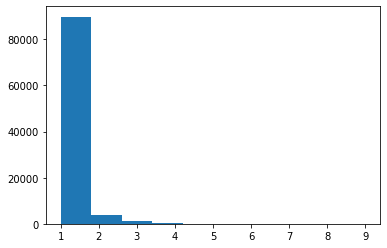

In [35]:
plt.hist(mydd.values())

## Season Pass Upgrade

** Number of admits would be double counted from day tickets

In [35]:
# set(df_revenue['ParentProductName'])
df_revenue[df_revenue['ParentProductName'] == '2019/2020 Season Pass Upgrade'][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
4383              366731         459827  459827-1608822    Fully Paid   
4384              366731         459827  459827-1608823    Fully Paid   
4385              366731         459827  459827-1608824    Fully Paid   
4386                   0         459827  459827-1608822    Fully Paid   
4387                   0         459827  459827-1608823    Fully Paid   
...                  ...            ...             ...           ...   
218441                 0         493454  493454-1703554    Fully Paid   
218442            397329         493454  493454-1703551    Fully Paid   
218443            397329         493454  493454-1703552    Fully Paid   
218444            397329         493454  493454-1703553    Fully Paid   
218445            397329         493454  493454-1703554    Fully Paid   

            TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
4383    16 Dec 2019 4:10 PM  23 Dec 2019 10:08 AM        GS5           39.45   
4384    16 Dec 2019 4:10 PM  03 Jan 2020 10:06 AM        GS5           39.45   
4385    16 Dec 2019 4:10 PM  23 Dec 2019 10:08 AM        GS5           49.45   
4386    16 Dec 2019 4:10 PM   16 Dec 2019 4:10 PM        GS5           39.45   
4387    16 Dec 2019 4:10 PM   16 Dec 2019 4:10 PM        GS5           39.45   
...                     ...                   ...        ...             ...   
218441  12 Jan 2020 6:06 PM   12 Jan 2020 6:06 PM        TG1           56.45   
218442  12 Jan 2020 6:06 PM   12 Jan 2020 6:06 PM        TG1           46.45   
218443  12 Jan 2020 6:06 PM   12 Jan 2020 6:06 PM        TG1           46.45   
218444  12 Jan 2020 6:06 PM   12 Jan 2020 6:06 PM        TG1           46.45   
218445  12 Jan 2020 6:06 PM   12 Jan 2020 6:06 PM        TG1           56.45   

                    ParentProductName            EventDate  ... IsRedemption  \
4383    2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...           NO   
4384    2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...           NO   
4385    2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...           NO   
4386    2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...          YES   
4387    2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...          YES   
...                               ...                  ...  ...          ...   
218441  2019/2020 Season Pass Upgrade  12 Jan 2020 6:06 PM  ...          YES   
218442  2019/2020 Season Pass Upgrade  12 Jan 2020 6:06 PM  ...           NO   
218443  2019/2020 Season Pass Upgrade  12 Jan 2020 6:06 PM  ...           NO   
218444  2019/2020 Season Pass Upgrade  12 Jan 2020 6:06 PM  ...           NO   
218445  2019/2020 Season Pass Upgrade  12 Jan 2020 6:06 PM  ...           NO   

       IsExpiration DeferredRevenue Discount FeeRevenue  AccountsReceivable  \
4383             NO           39.45      0.0        0.0                 0.0   
4384             NO           39.45      0.0        0.0                 0.0   
4385             NO           49.45      0.0        0.0                 0.0   
4386             NO          -39.45      0.0        0.0                 0.0   
4387             NO          -39.45      0.0        0.0                 0.0   
...             ...             ...      ...        ...                 ...   
218441           NO          -56.45      0.0        0.0                 0.0   
218442           NO           46.45      0.0        0.0                 0.0   
218443           NO           46.45      0.0        0.0                 0.0   
218444           NO           46.45      0.0        0.0                 0.0   
218445           NO           56.45      0.0        0.0                 0.0   

        FundsReceived  TaxOnFundsReceived  TaxPayable  NetRevenue  
4383            39.45            3.586364    0.000000    0.000000  
4384            39.45            3.586364    0.000000    0.000000  
4385            49.45            4.495455    0.000000   

In [39]:
df_book[df_book['BookingId'] == 459827]

BookingName  BookingDate         PurchaseDate BookingStatus  \
762  Ash Hughes  16 Dec 2019  16 Dec 2019 4:10 PM    Fully Paid   

    ContactFirstName ContactLastName SessionStartTime SessionEndTime  \
762              Ash          Hughes              NaN            NaN   

     GrandTotal  Balance  CustomerId  NumberPeople  Mobile  \
762      128.35      0.0      162482             3     NaN   

                    Email PurchaseLocation  BookingId  
762  ajhughes29@gmail.com              POS     459827

In [42]:
df_attn[df_attn['Booking ID'] == 459827]

Booking ID Booking Name                 Email  Booking Amount  \
26747      459827   Ash Hughes  ajhughes29@gmail.com          128.35   
26748      459827   Ash Hughes  ajhughes29@gmail.com          128.35   
26749      459827   Ash Hughes  ajhughes29@gmail.com          128.35   
26750      459827   Ash Hughes  ajhughes29@gmail.com          128.35   
26751      459827   Ash Hughes  ajhughes29@gmail.com          128.35   

       Redemptions Count          Checkin Time       Ticket ID  \
26747                  1  23 Dec 2019 10:08 AM  459827-1608822   
26748                  1  23 Dec 2019 10:08 AM  459827-1608824   
26749                  1  03 Jan 2020 10:06 AM  459827-1608823   
26750                  1  03 Jan 2020 10:05 AM  459827-1608822   
26751                  1  03 Jan 2020 10:06 AM  459827-1608824   

                                            Product Name  \
26747  2019/2020 Season Pass Upgrade - Season Pass up...   
26748  2019/2020 Season Pass Upgrade - Season Pass Up...   
26749  2019/2020 Season Pass Upgrade - Season Pass up...   
26750  2019/2020 Season Pass Upgrade - Season Pass up...   
26751  2019/2020 Season Pass Upgrade - Season Pass Up...   

                                  Product Reporting Name        Purchase Time  \
26747  2019/2020 Season Pass Upgrade - Season Pass up...  16 Dec 2019 4:10 PM   
26748  2019/2020 Season Pass Upgrade - Season Pass Up...  16 Dec 2019 4:10 PM   
26749  2019/2020 Season Pass Upgrade - Season Pass up...  16 Dec 2019 4:10 PM   
26750  2019/2020 Season Pass Upgrade - Season Pass up...  16 Dec 2019 4:10 PM   
26751  2019/2020 Season Pass Upgrade - Season Pass Up...  16 Dec 2019 4:10 PM   

      Device Name PostCode SessionTime    Country  
26747         TG1     3228         NaN  Australia  
26748         TG1     3228         NaN  Australia  
26749   RollerPad     3228         NaN  Australia  
26750   RollerPad     3228         NaN  Australia  
26751   RollerPad     3228         NaN  Australia

In [47]:
df_revenue[df_revenue['ReceiptNumber'] == 459827][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
4383            366731         459827  459827-1608822    Fully Paid   
4384            366731         459827  459827-1608823    Fully Paid   
4385            366731         459827  459827-1608824    Fully Paid   
4386                 0         459827  459827-1608822    Fully Paid   
4387                 0         459827  459827-1608823    Fully Paid   
4388                 0         459827  459827-1608824    Fully Paid   

          TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
4383  16 Dec 2019 4:10 PM  23 Dec 2019 10:08 AM        GS5           39.45   
4384  16 Dec 2019 4:10 PM  03 Jan 2020 10:06 AM        GS5           39.45   
4385  16 Dec 2019 4:10 PM  23 Dec 2019 10:08 AM        GS5           49.45   
4386  16 Dec 2019 4:10 PM   16 Dec 2019 4:10 PM        GS5           39.45   
4387  16 Dec 2019 4:10 PM   16 Dec 2019 4:10 PM        GS5           39.45   
4388  16 Dec 2019 4:10 PM   16 Dec 2019 4:10 PM        GS5           49.45   

                  ParentProductName            EventDate  ... IsRedemption  \
4383  2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...           NO   
4384  2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...           NO   
4385  2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...           NO   
4386  2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...          YES   
4387  2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...          YES   
4388  2019/2020 Season Pass Upgrade  16 Dec 2019 4:10 PM  ...          YES   

     IsExpiration DeferredRevenue Discount FeeRevenue  AccountsReceivable  \
4383           NO           39.45      0.0        0.0                 0.0   
4384           NO           39.45      0.0        0.0                 0.0   
4385           NO           49.45      0.0        0.0                 0.0   
4386           NO          -39.45      0.0        0.0                 0.0   
4387           NO          -39.45      0.0        0.0                 0.0   
4388           NO          -49.45      0.0        0.0                 0.0   

      FundsReceived  TaxOnFundsReceived  TaxPayable  NetRevenue  
4383          39.45            3.586364    0.000000    0.000000  
4384          39.45            3.586364    0.000000    0.000000  
4385          49.45            4.495455    0.000000    0.000000  
4386           0.00            0.000000    3.586364   35.863636  
4387           0.00            0.000000    3.586364   35.863636  
4388           0.00            0.000000    4.495455   44.954545  

[6 rows x 23 columns]

In [36]:
test_df, test_df_2 = season_revenue(df_revenue[df_revenue['ParentProductName'] == '2019/2020 Season Pass Upgrade'], 
                        admit_frequency, 'Season Pass Upgrades')

In [37]:
test_df

dates  count      revenue          revenue_type
0   2019-12-17      2    29.886364  Season Pass Upgrades
1   2019-12-19      1    35.863636  Season Pass Upgrades
2   2019-12-20      4   143.454545  Season Pass Upgrades
3   2019-12-21      4    34.695091  Season Pass Upgrades
4   2019-12-22      3    35.863636  Season Pass Upgrades
5   2019-12-23     23   324.454485  Season Pass Upgrades
6   2019-12-24     15   426.650636  Season Pass Upgrades
7   2019-12-26      1    17.931818  Season Pass Upgrades
8   2019-12-27      6   125.522727  Season Pass Upgrades
9   2019-12-28     25   608.920455  Season Pass Upgrades
10  2019-12-29     36  1059.530303  Season Pass Upgrades
11  2019-12-30     18   571.651515  Season Pass Upgrades
12  2019-12-31      9   189.250000  Season Pass Upgrades
13  2020-01-01      7   207.803030  Season Pass Upgrades
14  2020-01-02     21   362.166667  Season Pass Upgrades
15  2020-01-03     67  1813.299182  Season Pass Upgrades
16  2020-01-04     44  1177.469636  Season Pass Upgrades
17  2020-01-05     11   389.810606  Season Pass Upgrades
18  2020-01-06     17   384.121212  Season Pass Upgrades
19  2020-01-07      7   207.522727  Season Pass Upgrades
20  2020-01-08     30   675.522727  Season Pass Upgrades
21  2020-01-09     72  2124.393939  Season Pass Upgrades
22  2020-01-10     39  1422.795455  Season Pass Upgrades
23  2020-01-11     24   660.977273  Season Pass Upgrades
24  2020-01-12     20   614.446970  Season Pass Upgrades

In [38]:
test_df_2[test_df_2['dates'] == '2019-12-26']

dates         tickets    revenue
0  2019-12-26  461656-1613660  17.931818

In [52]:
df_revenue[df_revenue['ReceiptNumber'] == 461656][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
19196                 0         461656  461656-1613660    Fully Paid   
19197                 0         461656  461656-1613661    Fully Paid   
19198            368560         461656  461656-1613660    Fully Paid   
19199            368560         461656  461656-1613661    Fully Paid   

           TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
19196  18 Dec 2019 1:36 PM   18 Dec 2019 1:36 PM        GS6           39.45   
19197  18 Dec 2019 1:36 PM   18 Dec 2019 1:36 PM        GS6           39.45   
19198  18 Dec 2019 1:36 PM   26 Dec 2019 9:56 AM        GS6           39.45   
19199  18 Dec 2019 1:36 PM  23 Feb 2020 10:47 AM        GS6           39.45   

                   ParentProductName            EventDate  ... IsRedemption  \
19196  2019/2020 Season Pass Upgrade  18 Dec 2019 1:36 PM  ...          YES   
19197  2019/2020 Season Pass Upgrade  18 Dec 2019 1:36 PM  ...          YES   
19198  2019/2020 Season Pass Upgrade  18 Dec 2019 1:36 PM  ...           NO   
19199  2019/2020 Season Pass Upgrade  18 Dec 2019 1:36 PM  ...           NO   

      IsExpiration DeferredRevenue Discount FeeRevenue  AccountsReceivable  \
19196           NO          -39.45      0.0        0.0                 0.0   
19197           NO          -39.45      0.0        0.0                 0.0   
19198           NO           39.45      0.0        0.0                 0.0   
19199           NO           39.45      0.0        0.0                 0.0   

       FundsReceived  TaxOnFundsReceived  TaxPayable  NetRevenue  
19196           0.00            0.000000    3.586364   35.863636  
19197           0.00            0.000000    3.586364   35.863636  
19198          39.45            3.586364    0.000000    0.000000  
19199          39.45            3.586364    0.000000    0.000000  

[4 rows x 23 columns]

In [53]:
admit_frequency['461656-1613660']

['2019-12-26', '2020-01-02']

## Group Booking

In [113]:
# TODO: include school and birthday

In [39]:
# set(df_revenue['ParentProductName'])
df_revenue[df_revenue['ParentProductName'] == '2019/2020 Group Function Tickets'][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
1059              366453         457191  457191-1599973    Fully Paid   
1391                   0         452051  452051-1586529    Fully Paid   
1392                   0         452051  452051-1586859    Fully Paid   
1393                   0         452051  452051-1586862    Fully Paid   
1394                   0         452051  452051-1586863    Fully Paid   
...                  ...            ...             ...           ...   
195360            393827         488506  488506-1742773    Fully Paid   
195361            393827         488506  488506-1688370    Fully Paid   
195362            393827         488506  488506-1746548    Fully Paid   
195363            393827         488506  488506-1746549    Fully Paid   
195364            393827         488506  488506-1746550    Fully Paid   

             TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
1059     16 Dec 2019 8:41 AM                   NaN        NaN             0.0   
1391    06 Dec 2019 12:12 PM  16 Dec 2019 10:29 AM        NaN            36.0   
1392    06 Dec 2019 12:12 PM  16 Dec 2019 10:29 AM        NaN            36.0   
1393    06 Dec 2019 12:12 PM  16 Dec 2019 10:29 AM        NaN            36.0   
1394    06 Dec 2019 12:12 PM  16 Dec 2019 10:30 AM        NaN            36.0   
...                      ...                   ...        ...             ...   
195360   08 Jan 2020 2:49 PM  16 Feb 2020 12:17 PM        NaN            32.0   
195361   08 Jan 2020 2:49 PM  16 Feb 2020 10:01 AM        NaN            32.0   
195362   08 Jan 2020 2:49 PM  16 Feb 2020 12:16 PM        NaN            32.0   
195363   08 Jan 2020 2:49 PM  16 Feb 2020 12:16 PM        NaN            32.0   
195364   08 Jan 2020 2:49 PM  16 Feb 2020 12:15 PM        NaN            32.0   

                       ParentProductName             EventDate  ...  \
1059    2019/2020 Group Function Tickets   16 Dec 2019 8:41 AM  ...   
1391    2019/2020 Group Function Tickets  16 Dec 2019 10:29 AM  ...   
1392    2019/2020 Group Function Tickets  16 Dec 2019 10:29 AM  ...   
1393    2019/2020 Group Function Tickets  16 Dec 2019 10:29 AM  ...   
1394    2019/2020 Group Function Tickets  16 Dec 2019 10:30 AM  ...   
...                                  ...                   ...  ...   
195360  2019/2020 Group Function Tickets   08 Jan 2020 2:49 PM  ...   
195361  2019/2020 Group Function Tickets   08 Jan 2020 2:49 PM  ...   
195362  2019/2020 Group Function Tickets   08 Jan 2020 2:49 PM  ...   
195363  2019/2020 Group Function Tickets   08 Jan 2020 2:49 PM  ...   
195364  2019/2020 Group Function Tickets   08 Jan 2020 2:49 PM  ...   

       IsRedemption IsExpiration DeferredRevenue Discount FeeRevenue  \
1059             NO           NO          0.0000      0.0        0.0   
1391            YES           NO        -36.0000      0.0        0.0   
1392            YES           NO        -36.0000      0.0        0.0   
1393            YES           NO        -36.0000      0.0        0.0   
1394            YES           NO        -36.0000      0.0        0.0   
...             ...          ...             ...      ...        ...   
195360           NO           NO          7.5514      0.0        0.0   
195361           NO           NO          7.5514      0.0        0.0   
195362           NO           NO          7.5514      0.0        0.0   
195363           NO           NO          7.5514      0.0        0.0   
195364           NO           NO          7.5514      0.0        0.0   

        AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
1059                   0.0         0.0000            0.000000    0.000000   
1391                   0.0         0.0000            0.000000    3.272727   
1392                   0.0         0.0000            0.000000    3.272727   
1393                   0.0         0.0000            0.000000    3.272727   
1394                   0.0         0.0000            0.

In [40]:
df_revenue[df_revenue['ReceiptNumber'] == 452051][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
1391                 0         452051  452051-1586529    Fully Paid   
1392                 0         452051  452051-1586859    Fully Paid   
1393                 0         452051  452051-1586862    Fully Paid   
1394                 0         452051  452051-1586863    Fully Paid   
1395                 0         452051  452051-1586861    Fully Paid   
1396                 0         452051  452051-1586860    Fully Paid   
1397                 0         452051  452051-1586864    Fully Paid   
1398                 0         452051  452051-1586865    Fully Paid   
1399                 0         452051  452051-1586872    Fully Paid   
1400                 0         452051  452051-1586866    Fully Paid   
1403                 0         452051  452051-1586867    Fully Paid   
1404                 0         452051  452051-1586868    Fully Paid   
5747                 0         452051  452051-1589204    Fully Paid   
5748                 0         452051  452051-1589205    Fully Paid   
5749                 0         452051  452051-1589206    Fully Paid   
5750                 0         452051  452051-1589207    Fully Paid   
5751                 0         452051  452051-1589208    Fully Paid   
5752                 0         452051  452051-1589209    Fully Paid   
5753                 0         452051  452051-1589210    Fully Paid   
5754                 0         452051  452051-1589211    Fully Paid   
5755                 0         452051  452051-1589212    Fully Paid   
5756                 0         452051  452051-1589213    Fully Paid   
5757                 0         452051  452051-1589214    Fully Paid   
5758                 0         452051  452051-1589215    Fully Paid   
5759                 0         452051  452051-1589216    Fully Paid   
5760                 0         452051  452051-1589217    Fully Paid   
5761                 0         452051  452051-1589218    Fully Paid   
5762                 0         452051  452051-1589219    Fully Paid   
5763                 0         452051  452051-1589220    Fully Paid   
5764                 0         452051  452051-1589221    Fully Paid   
5765                 0         452051  452051-1589222    Fully Paid   
5766                 0         452051  452051-1589223    Fully Paid   

           TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
1391  06 Dec 2019 12:12 PM  16 Dec 2019 10:29 AM        NaN            36.0   
1392  06 Dec 2019 12:12 PM  16 Dec 2019 10:29 AM        NaN            36.0   
1393  06 Dec 2019 12:12 PM  16 Dec 2019 10:29 AM        NaN            36.0   
1394  06 Dec 2019 12:12 PM  16 Dec 2019 10:30 AM        NaN            36.0   
1395  06 Dec 2019 12:12 PM  16 Dec 2019 10:30 AM        NaN            36.0   
1396  06 Dec 2019 12:12 PM  16 Dec 2019 10:30 AM        NaN            36.0   
1397  06 Dec 2019 12:12 PM  16 Dec 2019 10:30 AM        NaN            36.0   
1398  06 Dec 2019 12:12 PM  16 Dec 2019 10:31 AM        NaN            36.0   
1399  06 Dec 2019 12:12 PM  16 Dec 2019 10:31 AM        NaN            36.0   
1400  06 Dec 2019 12:12 PM  16 Dec 2019 10:31 AM        NaN            36.0   
1403  06 Dec 2019 12:12 PM  16 Dec 2019 10:31 AM        NaN            36.0   
1404  06 Dec 2019 12:12 PM  16 Dec 2019 10:32 AM        NaN            36.0   
5747  06 Dec 2019 12:12 PM                   NaN        NaN            15.0   
5748  06 Dec 2019 12:12 PM                   NaN        NaN            15.0   
5749  06 Dec 2019 12:12 PM                   NaN        NaN            15.0   
5750  06 Dec 2019 12:12 PM                   NaN        NaN            15.0   
5751  06 Dec 2019 12:12 PM                   NaN        NaN            15.0   
5752  06 Dec 2019 12:12 PM                   NaN        NaN            15.0   
5753  06 Dec 2019 12:12 PM                   NaN        NaN            15.0   
5754  06 Dec 2019 12:12 PM                   NaN        NaN            15.0   
575

In [58]:
admit_frequency['452051-1586529']

['2019-12-16']

In [41]:
def group_revenue(df):
    '''
    BookingPayment Id is 0
    ReceiptNumber is under which the order is stored
    NetRevenue is considered as the tax isn't included
    EntryType is Redemption
    PaymentStatus can be Partially Paid or Fully Paid. Pendings are usually refunded
    Catering is not considered, only admissions per person
    Assumption - person in each group enters only once
    '''
    
    mydf = df[(df['EntryType'] == 'Redemption') & ((df['PaymentStatus'] == 'Partially Paid') | (df['PaymentStatus'] == 'Fully Paid'))].copy()
    mydf['timestamp'] = mydf['RedemptionDate'].apply(lambda x : pd.to_datetime(str(x)))
    mydf['dates'] = mydf['timestamp'].dt.date
    
    rdf = mydf.groupby('dates').agg({'TicketId': ['count'], 'NetRevenue': ['sum']}).reset_index()
    rdf.columns = ['dates', 'count', 'revenue']
    rdf['revenue_type'] = 'Group Tickets'
    
    return rdf

In [42]:
test_df = group_revenue(df_revenue[df_revenue['ParentProductName'] == '2019/2020 Group Function Tickets'])

In [43]:
test_df

dates  count       revenue   revenue_type
0  2019-12-16     12    392.727273  Group Tickets
1  2019-12-18      4    104.454545  Group Tickets
2  2019-12-19      8    208.909091  Group Tickets
3  2019-12-20      6    174.545455  Group Tickets
4  2019-12-21   1043  26201.818182  Group Tickets
5  2019-12-22     54   1454.545455  Group Tickets
6  2019-12-23     72   2094.545455  Group Tickets
7  2019-12-28      1     29.090909  Group Tickets
8  2019-12-30      6    156.681818  Group Tickets

In [44]:
df_revenue[df_revenue['ReceiptNumber'] == 444207][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
113516                 0         444207  444207-1513013    Fully Paid   

            TransactionDate       RedemptionDate DeviceName  TicketUnitCost  \
113516  20 Jun 2019 8:27 AM  28 Dec 2019 1:04 PM        NaN            32.0   

                       ParentProductName            EventDate  ...  \
113516  2019/2020 Group Function Tickets  28 Dec 2019 1:04 PM  ...   

       IsRedemption IsExpiration DeferredRevenue Discount FeeRevenue  \
113516          YES           NO           -32.0      0.0        0.0   

        AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
113516                 0.0            0.0                 0.0    2.909091   

        NetRevenue  
113516   29.090909  

[1 rows x 23 columns]

## Christmas Night Lights (Seperate Break-even Analysis)

In [45]:
# set(df_revenue['ParentProductName'])
df_revenue[(df_revenue['ParentProductName'] == '2019/2020 Christmas Festival of Lights') |
          (df_revenue['ParentProductName'] =='2019/2020 Season Pass Discounted Festival of Lights Ticket')][cols]

BookingPaymentId  ReceiptNumber        TicketId   PaymentStatus  \
0                 366432         459535  459535-1607914      Fully Paid   
26                366439         459542  459542-1607930      Fully Paid   
27                366439         459542  459542-1607931      Fully Paid   
28                366439         459542  459542-1607932      Fully Paid   
35                366441         459544  459544-1607936      Fully Paid   
...                  ...            ...             ...             ...   
213816            396547         465830  465830-1626600         Pending   
213817            396547         465830  465830-1626601         Pending   
213880            396566         456139  456139-1595191  Partially Paid   
214001            396591         456181  456181-1595280  Partially Paid   
214010            396595         456139  456139-1595191  Partially Paid   

            TransactionDate       RedemptionDate DeviceName  TicketUnitCost  \
0       16 Dec 2019 1:56 AM  22 Dec 2019 6:10 PM        NaN            17.5   
26      16 Dec 2019 7:44 AM  23 Dec 2019 6:00 PM        NaN            17.5   
27      16 Dec 2019 7:44 AM  23 Dec 2019 6:00 PM        NaN            17.5   
28      16 Dec 2019 7:44 AM  23 Dec 2019 6:00 PM        NaN            17.5   
35      16 Dec 2019 8:04 AM  16 Dec 2019 6:21 PM        NaN            17.5   
...                     ...                  ...        ...             ...   
213816  10 Jan 2020 1:36 PM  21 Dec 2019 9:27 PM        NaN            17.5   
213817  10 Jan 2020 1:36 PM  21 Dec 2019 9:27 PM        NaN            17.5   
213880  10 Jan 2020 2:00 PM                  NaN        NaN            17.5   
214001  10 Jan 2020 2:27 PM  20 Dec 2019 6:05 PM        NaN            17.5   
214010  10 Jan 2020 2:30 PM                  NaN        NaN            17.5   

                                        ParentProductName  \
0                  2019/2020 Christmas Festival of Lights   
26                 2019/2020 Christmas Festival of Lights   
27                 2019/2020 Christmas Festival of Lights   
28                 2019/2020 Christmas Festival of Lights   
35                 2019/2020 Christmas Festival of Lights   
...                                                   ...   
213816             2019/2020 Christmas Festival of Lights   
213817             2019/2020 Christmas Festival of Lights   
213880  2019/2020 Season Pass Discounted Festival of L...   
214001  2019/2020 Season Pass Discounted Festival of L...   
214010  2019/2020 Season Pass Discounted Festival of L...   

                  EventDate  ... IsRedemption IsExpiration DeferredRevenue  \
0       16 Dec 2019 1:56 AM  ...           NO           NO            17.5   
26      16 Dec 2019 7:44 AM  ...           NO           NO            17.5   
27      16 Dec 2019 7:44 AM  ...           NO           NO            17.5   
28      16 Dec 2019 7:44 AM  ...           NO           NO            17.5   
35      16 Dec 2019 8:04 AM  ...           NO           NO            17.5   
...                     ...  ...          ...          ...             ...   
213816  10 Jan 2020 1:36 PM  ...           NO           NO             0.0   
213817  10 Jan 2020 1:36 PM  ...           NO           NO             0.0   
213880  10 Jan 2020 2:00 PM  ...           NO           NO             0.0   
214001  10 Jan 2020 2:27 PM  ...           NO           NO             0.0   
214010  10 Jan 2020 2:30 PM  ...           NO           NO             0.0   

       Discount FeeRevenue  AccountsReceivable  FundsReceived  \
0           0.0     1.3100              0.0000        18.8100   
26          0.0     1.3067              0.0000        18.8067   
27          0.0     1.3067              0.0000        18.8067   
28          0.0     1.3067              0.0000        18.8067   
35          0.0     1.3067              0.0000        18.8067   
...         ...        ...                 ...            ...   
213816      0.0     0.0000       

In [46]:
df_revenue[df_revenue['ReceiptNumber'] == 459535][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
0                366432         459535  459535-1607914    Fully Paid   
56879                 0         459535  459535-1607914    Fully Paid   

           TransactionDate       RedemptionDate DeviceName  TicketUnitCost  \
0      16 Dec 2019 1:56 AM  22 Dec 2019 6:10 PM        NaN            17.5   
56879  16 Dec 2019 1:56 AM  22 Dec 2019 6:10 PM        NaN            17.5   

                            ParentProductName            EventDate  ...  \
0      2019/2020 Christmas Festival of Lights  16 Dec 2019 1:56 AM  ...   
56879  2019/2020 Christmas Festival of Lights  22 Dec 2019 6:10 PM  ...   

      IsRedemption IsExpiration DeferredRevenue Discount FeeRevenue  \
0               NO           NO            17.5      0.0       1.31   
56879          YES           NO           -17.5      0.0       0.00   

       AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
0                     0.0          18.81                1.71    0.000000   
56879                 0.0           0.00                0.00    1.590909   

       NetRevenue  
0        0.000000  
56879   15.909091  

[2 rows x 23 columns]

In [47]:
# dictionary to see which booking id contains both types of bookings
xmas_booking = defaultdict(list)

for idx, row in df_revenue[(df_revenue['ParentProductName'] == '2019/2020 Christmas Festival of Lights') |
          (df_revenue['ParentProductName'] =='2019/2020 Season Pass Discounted Festival of Lights Ticket')].iterrows():
    
    xmas_booking[row['ReceiptNumber']].append(row['ParentProductName'])

In [49]:
set(xmas_booking[445579])

{'2019/2020 Christmas Festival of Lights'}

In [50]:
df_attn[df_attn['Ticket ID'] == '459630-1608166']

Booking ID    Booking Name                Email  Booking Amount  \
26441      459630  Kate Pritchard  k8.mason7@gmail.com           57.43   

       Redemptions Count         Checkin Time       Ticket ID  \
26441                  1  16 Dec 2019 5:58 PM  459630-1608166   

                                            Product Name  \
26441  2019/2020 Christmas Festival of Lights - Chris...   

                                  Product Reporting Name  \
26441  2019/2020 Christmas Festival of Lights - Chris...   

              Purchase Time Device Name PostCode SessionTime Country  
26441  16 Dec 2019 11:04 AM         TG1     3224         NaN     NaN

In [51]:
df_attn[df_attn['Booking ID'] == 459562]

Booking ID Booking Name                        Email  Booking Amount  \
26300      459562  casey blair  sohohairdressing@y7mail.com           67.34   
26301      459562  casey blair  sohohairdressing@y7mail.com           67.34   
26302      459562  casey blair  sohohairdressing@y7mail.com           67.34   
26303      459562  casey blair  sohohairdressing@y7mail.com           67.34   
26304      459562  casey blair  sohohairdressing@y7mail.com           67.34   

       Redemptions Count         Checkin Time       Ticket ID  \
26300                  1  17 Dec 2019 6:05 PM  459562-1607985   
26301                  1  17 Dec 2019 6:05 PM  459562-1607986   
26302                  1  17 Dec 2019 6:05 PM  459562-1607987   
26303                  1  17 Dec 2019 6:05 PM  459562-1607989   
26304                  1  17 Dec 2019 6:05 PM  459562-1607988   

                                            Product Name  \
26300  2019/2020 Season Pass Discounted Festival of L...   
26301  2019/2020 Season Pass Discounted Festival of L...   
26302  2019/2020 Season Pass Discounted Festival of L...   
26303  2019/2020 Christmas Festival of Lights - Chris...   
26304  2019/2020 Christmas Festival of Lights - Chris...   

                                  Product Reporting Name        Purchase Time  \
26300  2019/2020 Season Pass Discounted Festival of L...  16 Dec 2019 9:33 AM   
26301  2019/2020 Season Pass Discounted Festival of L...  16 Dec 2019 9:33 AM   
26302  2019/2020 Season Pass Discounted Festival of L...  16 Dec 2019 9:33 AM   
26303  2019/2020 Christmas Festival of Lights - Chris...  16 Dec 2019 9:33 AM   
26304  2019/2020 Christmas Festival of Lights - Chris...  16 Dec 2019 9:33 AM   

      Device Name PostCode SessionTime Country  
26300         TG2     3215         NaN     NaN  
26301         TG2     3215         NaN     NaN  
26302         TG2     3215         NaN     NaN  
26303         TG2     3215         NaN     NaN  
26304         TG2     3215         NaN     NaN

In [52]:
# season pass members get 50% off (445579), first night they get 100% off (not sure)
# - identify using deferred revenue. if the net + tax + deferred = 0 then no discount
# - otherswise 2019/2020 Season Pass Discounted Festival of Lights Ticket already applies the discount
# under 90 cms child is free (454630) should be accounted for, redemption
# - if revenue is 0 and ticket is redeemed
#

def xmas_calculator(row, xmas_booking):
    
    if (len(set(xmas_booking[row['ReceiptNumber']])) > 1) or (row['ParentProductName'] == '2019/2020 Season Pass Discounted Festival of Lights Ticket'):
        # respective discounted applied to net revenue
        return row['NetRevenue']
    
    elif row['ParentProductName'] == '2019/2020 Christmas Festival of Lights':
        if (row['NetRevenue'] + row['TaxPayable'] + row['DeferredRevenue']) == 0:
            return row['NetRevenue']
        else:
            # 10% is gone to tax
            return (row['NetRevenue'] + row['TaxPayable'] + row['DeferredRevenue']) * 0.9
        
    

def christmas_revenue(df, xmas_booking):
    '''
    BookingPayment Id is 0
    ReceiptNumber is under which the order is stored
    NetRevenue is considered as the tax isn't included
    EntryType is Redemption
    PaymentStatus can be Partially Paid or Fully Paid. Pendings are usually refunded
    '''
    
    mydf = df[(df['EntryType'] == 'Redemption') & ((df['PaymentStatus'] == 'Partially Paid') | (df['PaymentStatus'] == 'Fully Paid'))].copy()
    mydf['timestamp'] = mydf['RedemptionDate'].apply(lambda x : pd.to_datetime(str(x)))
    mydf['dates'] = mydf['timestamp'].dt.date
    
    mydf['CalculatedRevenue'] = mydf.apply(lambda x: xmas_calculator(x,xmas_booking), axis = 1)
    
    rdf = mydf.groupby('dates').agg({'TicketId': ['count'], 'CalculatedRevenue': ['sum']}).reset_index()
    rdf.columns = ['dates', 'count', 'revenue']
    rdf['revenue_type'] = 'Christmas Night Lights Tickets'
    
    return rdf, mydf

In [53]:
test_df, test_df_2 = christmas_revenue(df_revenue[(df_revenue['ParentProductName'] == '2019/2020 Christmas Festival of Lights') |
          (df_revenue['ParentProductName'] =='2019/2020 Season Pass Discounted Festival of Lights Ticket')], xmas_booking)

In [54]:
test_df

dates  count       revenue                    revenue_type
0  2019-12-16    462   6379.545455  Christmas Night Lights Tickets
1  2019-12-17    872  12162.500990  Christmas Night Lights Tickets
2  2019-12-18    938  13499.563726  Christmas Night Lights Tickets
3  2019-12-19   1217  18211.931818  Christmas Night Lights Tickets
4  2019-12-20    814  11652.904595  Christmas Night Lights Tickets
5  2019-12-21   2495  36200.023087  Christmas Night Lights Tickets
6  2019-12-22   3486  50808.555758  Christmas Night Lights Tickets
7  2019-12-23   4137  60577.602873  Christmas Night Lights Tickets
8  2019-12-24   2271  32836.363186  Christmas Night Lights Tickets

In [55]:
test_df_2[test_df_2['ReceiptNumber'] == 445579][cols + ['CalculatedRevenue']]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
80982                 0         445579  445579-1540327    Fully Paid   
80983                 0         445579  445579-1540328    Fully Paid   
80984                 0         445579  445579-1540329    Fully Paid   
80985                 0         445579  445579-1540330    Fully Paid   

            TransactionDate       RedemptionDate DeviceName  TicketUnitCost  \
80982  15 Oct 2019 12:48 PM  23 Dec 2019 9:00 PM        NaN            17.5   
80983  15 Oct 2019 12:48 PM  23 Dec 2019 9:00 PM        NaN            17.5   
80984  15 Oct 2019 12:48 PM  23 Dec 2019 9:00 PM        NaN            17.5   
80985  15 Oct 2019 12:48 PM  23 Dec 2019 9:00 PM        NaN            17.5   

                            ParentProductName            EventDate  ...  \
80982  2019/2020 Christmas Festival of Lights  23 Dec 2019 9:00 PM  ...   
80983  2019/2020 Christmas Festival of Lights  23 Dec 2019 9:00 PM  ...   
80984  2019/2020 Christmas Festival of Lights  23 Dec 2019 9:00 PM  ...   
80985  2019/2020 Christmas Festival of Lights  23 Dec 2019 9:00 PM  ...   

      IsExpiration DeferredRevenue Discount FeeRevenue AccountsReceivable  \
80982           NO           -8.75      0.0        0.0               8.75   
80983           NO           -8.75      0.0        0.0               8.75   
80984           NO           -8.75      0.0        0.0               8.75   
80985           NO           -8.75      0.0        0.0               8.75   

       FundsReceived  TaxOnFundsReceived  TaxPayable  NetRevenue  \
80982            0.0                 0.0    1.590909   15.909091   
80983            0.0                 0.0    1.590909   15.909091   
80984            0.0                 0.0    1.590909   15.909091   
80985            0.0                 0.0    1.590909   15.909091   

       CalculatedRevenue  
80982              7.875  
80983              7.875  
80984              7.875  
80985              7.875  

[4 rows x 24 columns]

In [56]:
test_df_2[test_df_2['ReceiptNumber'] == 459562][cols + ['CalculatedRevenue']]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
11977                 0         459562  459562-1607985    Fully Paid   
11978                 0         459562  459562-1607986    Fully Paid   
11979                 0         459562  459562-1607987    Fully Paid   
11980                 0         459562  459562-1607989    Fully Paid   
11981                 0         459562  459562-1607988    Fully Paid   

           TransactionDate       RedemptionDate DeviceName  TicketUnitCost  \
11977  16 Dec 2019 9:33 AM  17 Dec 2019 6:05 PM        NaN            17.5   
11978  16 Dec 2019 9:33 AM  17 Dec 2019 6:05 PM        NaN            17.5   
11979  16 Dec 2019 9:33 AM  17 Dec 2019 6:05 PM        NaN            17.5   
11980  16 Dec 2019 9:33 AM  17 Dec 2019 6:05 PM        NaN            17.5   
11981  16 Dec 2019 9:33 AM  17 Dec 2019 6:05 PM        NaN            17.5   

                                       ParentProductName            EventDate  \
11977  2019/2020 Season Pass Discounted Festival of L...  17 Dec 2019 6:05 PM   
11978  2019/2020 Season Pass Discounted Festival of L...  17 Dec 2019 6:05 PM   
11979  2019/2020 Season Pass Discounted Festival of L...  17 Dec 2019 6:05 PM   
11980             2019/2020 Christmas Festival of Lights  17 Dec 2019 6:05 PM   
11981             2019/2020 Christmas Festival of Lights  17 Dec 2019 6:05 PM   

       ... IsExpiration DeferredRevenue Discount FeeRevenue  \
11977  ...           NO           61.25      0.0        0.0   
11978  ...           NO           61.25      0.0        0.0   
11979  ...           NO           61.25      0.0        0.0   
11980  ...           NO         -122.50      0.0        0.0   
11981  ...           NO         -122.50      0.0        0.0   

      AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
11977               70.0            0.0                 0.0    0.795455   
11978               70.0            0.0                 0.0    0.795455   
11979               70.0            0.0                 0.0    0.795455   
11980             -105.0            0.0                 0.0    1.590909   
11981             -105.0            0.0                 0.0    1.590909   

       NetRevenue  CalculatedRevenue  
11977    7.954545           7.954545  
11978    7.954545           7.954545  
11979    7.954545           7.954545  
11980   15.909091          15.909091  
11981   15.909091          15.909091  

[5 rows x 24 columns]

## Third Party Bookings

In [114]:
# set(df_revenue['ParentProductName'])

In [57]:
third_party_product = ['RACV Height upgrade',
                       '2019/2020 RACV']

df_revenue[(df_revenue['ParentProductName'] == third_party_product[0]) |
                     (df_revenue['ParentProductName'] == third_party_product[1])][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
1333                   0         459597  459597-1608071    Fully Paid   
1340                   0         459597  459597-1608071    Fully Paid   
1344                   0         459599  459599-1608075    Fully Paid   
1345                   0         459599  459599-1608075    Fully Paid   
1362                   0         459603  459603-1608086    Fully Paid   
...                  ...            ...             ...           ...   
218199                 0         493386  493386-1703376    Fully Paid   
218200                 0         493388  493388-1703378    Fully Paid   
218201                 0         493388  493388-1703378    Fully Paid   
218202                 0         493389  493389-1703379    Fully Paid   
218203                 0         493389  493389-1703379    Fully Paid   

             TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
1333    16 Dec 2019 10:12 AM  16 Dec 2019 10:13 AM        NaN             0.0   
1340    16 Dec 2019 10:12 AM  16 Dec 2019 10:13 AM        NaN             0.0   
1344    16 Dec 2019 10:13 AM  16 Dec 2019 10:13 AM        NaN             0.0   
1345    16 Dec 2019 10:13 AM  16 Dec 2019 10:13 AM        NaN             0.0   
1362    16 Dec 2019 10:20 AM  16 Dec 2019 10:20 AM        NaN             0.0   
...                      ...                   ...        ...             ...   
218199   12 Jan 2020 2:15 PM   12 Jan 2020 2:15 PM        NaN             0.0   
218200   12 Jan 2020 2:15 PM   12 Jan 2020 2:15 PM        NaN             0.0   
218201   12 Jan 2020 2:15 PM   12 Jan 2020 2:15 PM        NaN             0.0   
218202   12 Jan 2020 2:15 PM   12 Jan 2020 2:15 PM        NaN             0.0   
218203   12 Jan 2020 2:15 PM   12 Jan 2020 2:15 PM        NaN             0.0   

       ParentProductName             EventDate  ... IsRedemption IsExpiration  \
1333      2019/2020 RACV  16 Dec 2019 10:12 AM  ...           NO           NO   
1340      2019/2020 RACV  16 Dec 2019 10:13 AM  ...          YES           NO   
1344      2019/2020 RACV  16 Dec 2019 10:13 AM  ...           NO           NO   
1345      2019/2020 RACV  16 Dec 2019 10:13 AM  ...          YES           NO   
1362      2019/2020 RACV  16 Dec 2019 10:20 AM  ...           NO           NO   
...                  ...                   ...  ...          ...          ...   
218199    2019/2020 RACV   12 Jan 2020 2:15 PM  ...          YES           NO   
218200    2019/2020 RACV   12 Jan 2020 2:15 PM  ...           NO           NO   
218201    2019/2020 RACV   12 Jan 2020 2:15 PM  ...          YES           NO   
218202    2019/2020 RACV   12 Jan 2020 2:15 PM  ...           NO           NO   
218203    2019/2020 RACV   12 Jan 2020 2:15 PM  ...          YES           NO   

       DeferredRevenue Discount FeeRevenue  AccountsReceivable  FundsReceived  \
1333               0.0      0.0        0.0                 0.0            0.0   
1340               0.0      0.0        0.0                 0.0            0.0   
1344               0.0      0.0        0.0                 0.0            0.0   
1345               0.0      0.0        0.0                 0.0            0.0   
1362               0.0      0.0        0.0                 0.0            0.0   
...                ...      ...        ...                 ...            ...   
218199             0.0      0.0        0.0                 0.0            0.0   
218200             0.0      0.0        0.0                 0.0            0.0   
218201             0.0      0.0        0.0                 0.0            0.0   
218202             0.0      0.0        0.0                 0.0            0.0   
218203             0.0      0.0        0.0                 0.0            0.0   

        TaxOnFundsReceived  TaxPayable  NetRevenue  
1333                   0.0         0.0         0.0  
1340                   0.0         0.0         0.0  
1344                   0.0         0.0         0.0  


In [58]:
df_attn[df_attn['Booking ID'] == 459597]

Booking ID  Booking Name Email  Booking Amount  Redemptions Count  \
26388      459597  RACV12310742   NaN             0.0                  1   

               Checkin Time       Ticket ID  \
26388  16 Dec 2019 10:13 AM  459597-1608071   

                                 Product Name  \
26388  2019/2020 RACV - RACV Admission Ticket   

                       Product Reporting Name         Purchase Time  \
26388  2019/2020 RACV - RACV Admission Ticket  16 Dec 2019 10:12 AM   

      Device Name PostCode SessionTime Country  
26388         TG2      NaN         NaN     NaN

In [59]:
cost_price_third_party = pd.read_excel('data/third_party_agreements.xls', sheet_name='agreements', index_col='ParentProductName')
cost_price_third_party

Date  Discount  General Admission  Junior Admission  \
ParentProductName                                                             
RACV              2020-08-22       0.1               37.2              29.2   
Group On          2020-08-22       0.1               37.2              29.2   
Scoop On          2020-08-22       0.1               37.2              29.2   
Red Balloon       2020-08-22       0.0                0.0               0.0   
Trip Advisor      2020-08-22       0.0               37.2              29.2   

                   Senior Admission  
ParentProductName                    
RACV                           23.2  
Group On                       23.2  
Scoop On                       23.2  
Red Balloon                     0.0  
Trip Advisor                    0.0

In [60]:
cost_price_third_party = cost_price_third_party[cost_price_third_party['Date'] == '2020-08-22']

In [61]:
cost_price_third_party.loc['RACV']

Date                 2020-08-22 00:00:00
Discount                             0.1
General Admission                   37.2
Junior Admission                    29.2
Senior Admission                    23.2
Name: RACV, dtype: object

In [62]:
df_revenue[df_revenue['ReceiptNumber'] == 477154][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
123900            383185         477154  477154-1658164    Fully Paid   
123901            383185         477154  477154-1658174    Fully Paid   
123902                 0         477154  477154-1658164    Fully Paid   
123908                 0         477154  477154-1658174    Fully Paid   

             TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
123900  29 Dec 2019 11:10 AM  29 Dec 2019 11:10 AM        TG2            0.00   
123901  29 Dec 2019 11:10 AM  29 Dec 2019 11:10 AM        TG2           13.65   
123902  29 Dec 2019 11:10 AM  29 Dec 2019 11:10 AM        TG2            0.00   
123908  29 Dec 2019 11:10 AM  29 Dec 2019 11:10 AM        TG2           13.65   

            ParentProductName             EventDate  ... IsRedemption  \
123900         2019/2020 RACV  29 Dec 2019 11:10 AM  ...           NO   
123901  2019/2020 DAY TICKETS  29 Dec 2019 11:10 AM  ...           NO   
123902         2019/2020 RACV  29 Dec 2019 11:10 AM  ...          YES   
123908  2019/2020 DAY TICKETS  29 Dec 2019 11:10 AM  ...          YES   

       IsExpiration DeferredRevenue Discount FeeRevenue  AccountsReceivable  \
123900           NO            0.00      0.0        0.0                 0.0   
123901           NO           13.65      0.0        0.0                 0.0   
123902           NO            0.00      0.0        0.0                 0.0   
123908           NO          -13.65      0.0        0.0                 0.0   

        FundsReceived  TaxOnFundsReceived  TaxPayable  NetRevenue  
123900           0.00            0.000000    0.000000    0.000000  
123901          13.65            1.240909    0.000000    0.000000  
123902           0.00            0.000000    0.000000    0.000000  
123908           0.00            0.000000    1.240909   12.409091  

[4 rows x 23 columns]

In [70]:
# set(df_attn['Product Name'])
# '2019/2020 DAY TICKETS - RACV Height upgrade',
# '2019/2020 RACV - RACV Admission Ticket'

In [71]:
type_admits = defaultdict()

for idx, row in df_attn.iterrows():
    if row['Product Name'] in type_admits.keys():
        type_admits[row['Product Name']] += 1
    else:
        type_admits[row['Product Name']] = 1

In [72]:
for x in ['2019/2020 DAY TICKETS - RACV Height upgrade', '2019/2020 RACV - RACV Admission Ticket']:
    print(type_admits[x])

46
4648


In [98]:
# loop through the dataframe, realise the revenue only if the ticket is present in the attendance
# RACV height upgrade, revenue is recognized by Roller
# 477154: 2019/2020 DAY TICKETS are counting RACV height upgrades
# how to differentiate between General, Junior and Senior?

def party_calculator(row, cost_price_third_party, w1, w2, total_racv_admits):
    
    if (row['ParentProductName'] == '2019/2020 RACV'):
        return (w1/total_racv_admits) * float(cost_price_third_party.loc['RACV']['Junior Admission']
                                             ) + (w2/total_racv_admits) * float(
            cost_price_third_party.loc['RACV']['General Admission'])
    
    elif row['ProductName'] == 'RACV Height upgrade':
        return row['NetRevenue']
    
#     else:
#         return row['NetRevenue']
        
    

def party_revenue(df, cost_price_third_party, type_admits):
    '''
    BookingPayment Id is 0
    ReceiptNumber is under which the order is stored
    NetRevenue is considered as the tax isn't included
    EntryType is Redemption
    PaymentStatus can be Partially Paid or Fully Paid. Pendings are usually refunded
    '''
    
    mydf = df[(df['EntryType'] == 'Redemption') & ((df['PaymentStatus'] == 'Partially Paid') | (df['PaymentStatus'] == 'Fully Paid'))].copy()
    mydf['timestamp'] = mydf['RedemptionDate'].apply(lambda x : pd.to_datetime(str(x)))
    mydf['dates'] = mydf['timestamp'].dt.date
    
    
    # using the weight average to cost out the net reveneue
    w1 = type_admits['2019/2020 DAY TICKETS - RACV Height upgrade']
    w2 = type_admits['2019/2020 RACV - RACV Admission Ticket']
    mydf['CalculatedRevenue'] = mydf.apply(lambda x: party_calculator(x, cost_price_third_party, w1, w2, w1 + w2), axis = 1)
    
    rdf = mydf.groupby('dates').agg({'TicketId': ['count'], 'CalculatedRevenue': ['sum']}).reset_index()
    rdf.columns = ['dates', 'count', 'revenue']
    rdf['revenue_type'] = 'RACV Tickets'
    
    return rdf

In [99]:
test_df = party_revenue(df_revenue[(df_revenue['ProductName'] == third_party_product[0]) |
                     (df_revenue['ParentProductName'] == third_party_product[1])], 
                                  cost_price_third_party, type_admits)

In [100]:
test_df

dates  count       revenue  revenue_type
0   2019-12-16      7    259.851214  RACV Tickets
1   2019-12-17     37   1373.499276  RACV Tickets
2   2019-12-18     34   1262.134470  RACV Tickets
3   2019-12-19     18    668.188837  RACV Tickets
4   2019-12-20     57   2115.931317  RACV Tickets
5   2019-12-21     40   1484.864082  RACV Tickets
6   2019-12-22     47   1744.715296  RACV Tickets
7   2019-12-23     48   1781.836898  RACV Tickets
8   2019-12-24     62   2301.539327  RACV Tickets
9   2019-12-26     96   3563.673796  RACV Tickets
10  2019-12-27    368  13660.749553  RACV Tickets
11  2019-12-28    577  21419.164380  RACV Tickets
12  2019-12-29    554  20565.367533  RACV Tickets
13  2019-12-30    173   6422.037154  RACV Tickets
14  2019-12-31     45   1670.472092  RACV Tickets
15  2020-01-01    215   7981.144440  RACV Tickets
16  2020-01-02    409  15182.735236  RACV Tickets
17  2020-01-03    555  20602.489135  RACV Tickets
18  2020-01-04    338  12547.101491  RACV Tickets
19  2020-01-05      4    148.486408  RACV Tickets
20  2020-01-06     30   1113.648061  RACV Tickets
21  2020-01-07     47   1744.715296  RACV Tickets
22  2020-01-08    178   6607.645164  RACV Tickets
23  2020-01-09    439  16296.383298  RACV Tickets
24  2020-01-10    128   4751.565062  RACV Tickets
25  2020-01-11     47   1744.715296  RACV Tickets
26  2020-01-12     69   2561.390541  RACV Tickets

## Online Agent Tickets

In [101]:
test_df = day_revenue(df_revenue[df_revenue['ParentProductName'] == '2019/2020 Online Agent Tickets'], 
                                  'Online Tickets')

In [102]:
test_df

dates  count     revenue    revenue_type
0   2019-12-17     12  337.509091  Online Tickets
1   2019-12-18      4  112.500000  Online Tickets
2   2019-12-19      8  225.000000  Online Tickets
3   2019-12-20     21  590.624000  Online Tickets
4   2019-12-21      4  112.500000  Online Tickets
5   2019-12-22      4  112.500000  Online Tickets
6   2019-12-23      4   41.818182  Online Tickets
7   2019-12-26      8  224.999000  Online Tickets
8   2019-12-27     20  562.500000  Online Tickets
9   2019-12-28      4  112.500000  Online Tickets
10  2019-12-30      8   83.636364  Online Tickets
11  2020-01-04     16  374.767273  Online Tickets
12  2020-01-08      9   94.090909  Online Tickets
13  2020-01-10      8  224.999000  Online Tickets

## School Excursion & Birthdays 

In [109]:
df_revenue[df_revenue['ParentProductName'] == '2019/2020 School Excursion Tickets'][cols]

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
46                366443         446145  446145-1547365    Fully Paid   
47                366443         446145  446145-1547366    Fully Paid   
48                366443         446145  446145-1547367    Fully Paid   
49                366443         446145  446145-1547368    Fully Paid   
50                366443         446145  446145-1547369    Fully Paid   
...                  ...            ...             ...           ...   
197510            394111         444671  444671-1539358    Fully Paid   
197511            394111         444671  444671-1539359    Fully Paid   
197512            394111         444671  444671-1539360    Fully Paid   
197513            394111         444671  444671-1539361    Fully Paid   
197514            394111         444671  444671-1539362    Fully Paid   

            TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
46      16 Dec 2019 8:21 AM  11 Dec 2019 10:24 AM        NaN            24.5   
47      16 Dec 2019 8:21 AM  11 Dec 2019 10:24 AM        NaN            24.5   
48      16 Dec 2019 8:21 AM  11 Dec 2019 10:24 AM        NaN            24.5   
49      16 Dec 2019 8:21 AM  11 Dec 2019 10:24 AM        NaN            24.5   
50      16 Dec 2019 8:21 AM  11 Dec 2019 10:24 AM        NaN            24.5   
...                     ...                   ...        ...             ...   
197510  09 Jan 2020 8:27 AM  18 Dec 2019 12:19 PM        NaN            24.5   
197511  09 Jan 2020 8:27 AM  18 Dec 2019 12:19 PM        NaN            24.5   
197512  09 Jan 2020 8:27 AM  18 Dec 2019 12:19 PM        NaN            24.5   
197513  09 Jan 2020 8:27 AM  18 Dec 2019 12:19 PM        NaN            24.5   
197514  09 Jan 2020 8:27 AM  18 Dec 2019 12:19 PM        NaN            24.5   

                         ParentProductName            EventDate  ...  \
46      2019/2020 School Excursion Tickets  16 Dec 2019 8:21 AM  ...   
47      2019/2020 School Excursion Tickets  16 Dec 2019 8:21 AM  ...   
48      2019/2020 School Excursion Tickets  16 Dec 2019 8:21 AM  ...   
49      2019/2020 School Excursion Tickets  16 Dec 2019 8:21 AM  ...   
50      2019/2020 School Excursion Tickets  16 Dec 2019 8:21 AM  ...   
...                                    ...                  ...  ...   
197510  2019/2020 School Excursion Tickets  09 Jan 2020 8:27 AM  ...   
197511  2019/2020 School Excursion Tickets  09 Jan 2020 8:27 AM  ...   
197512  2019/2020 School Excursion Tickets  09 Jan 2020 8:27 AM  ...   
197513  2019/2020 School Excursion Tickets  09 Jan 2020 8:27 AM  ...   
197514  2019/2020 School Excursion Tickets  09 Jan 2020 8:27 AM  ...   

       IsRedemption IsExpiration DeferredRevenue Discount FeeRevenue  \
46               NO           NO             0.0      0.0        0.0   
47               NO           NO             0.0      0.0        0.0   
48               NO           NO             0.0      0.0        0.0   
49               NO           NO             0.0      0.0        0.0   
50               NO           NO             0.0      0.0        0.0   
...             ...          ...             ...      ...        ...   
197510           NO           NO             0.0      0.0        0.0   
197511           NO           NO             0.0      0.0        0.0   
197512           NO           NO             0.0      0.0        0.0   
197513           NO           NO             0.0      0.0        0.0   
197514           NO           NO             0.0      0.0        0.0   

        AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
46                -15.2601        15.2601            1.387282         0.0   
47                -15.2601        15.2601            1.387282         0.0   
48                -15.2601        15.2601            1.387282         0.0   
49                -15.2601        15.2601            1.387282         0.0   
50                -15.2601        15.2601            1.

In [138]:
def excursion_revenue(df, revenue_type):
    '''
    ReceiptNumber is under which the order is stored
    FundsReceived is considered as the payment
    EntryType is Transaction
    PaymentStatus can be Partially Paid or Fully Paid. 
    '''
    
    mydf = df[(df['EntryType'] == 'Transaction') & 
              ((df['PaymentStatus'] == 'Partially Paid') | (df['PaymentStatus'] == 'Fully Paid'))].copy()
    mydf['timestamp'] = mydf['RedemptionDate'].apply(lambda x : pd.to_datetime(str(x)))
    mydf['dates'] = mydf['timestamp'].dt.date
    
    new_df = pd.DataFrame(mydf.groupby(['TicketId', 'dates']).sum()['FundsReceived']).reset_index()
    
    rdf = new_df.groupby('dates').agg({'TicketId': ['count'], 'FundsReceived': ['sum']}).reset_index()
    rdf.columns = ['dates', 'count', 'revenue']
    rdf['revenue_type'] = revenue_type
    
    return rdf, new_df

In [139]:
test_df, test_df_2 = excursion_revenue(df_revenue[df_revenue['ParentProductName'] == '2019/2020 School Excursion Tickets'],
                  'Excursion Tickets')

In [140]:
test_df

dates  count     revenue       revenue_type
0   2019-11-29    103    895.8699  Excursion Tickets
1   2019-12-02     33    481.6088  Excursion Tickets
2   2019-12-05   1320  18741.1721  Excursion Tickets
3   2019-12-06    369   4951.1734  Excursion Tickets
4   2019-12-09    323   4789.8007  Excursion Tickets
5   2019-12-10    674   9694.5130  Excursion Tickets
6   2019-12-11    695  10562.4305  Excursion Tickets
7   2019-12-12   1160  16666.2423  Excursion Tickets
8   2019-12-13   1311  17954.0445  Excursion Tickets
9   2019-12-16   1704  24060.6597  Excursion Tickets
10  2019-12-17   1461  20832.8765  Excursion Tickets
11  2019-12-18   2539  37310.1729  Excursion Tickets
12  2019-12-19   1739  25148.7889  Excursion Tickets
13  2019-12-20     17    294.0000  Excursion Tickets
14  2019-12-23    164   3577.0000  Excursion Tickets
15  2020-02-20     84    249.0395  Excursion Tickets

In [142]:
# might be worth checking the dates they attended based on df_attn

# Chloe's workings

## Bulk Bookings

In [15]:
df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Bulk Tickets'][cols].head()

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
7574            367154         460237  460237-1609905    Fully Paid   
7575            367154         460237  460237-1609906    Fully Paid   
7576            367154         460237  460237-1609907    Fully Paid   
7577            367154         460237  460237-1609908    Fully Paid   
7578            367154         460237  460237-1609909    Fully Paid   

           TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
7574  17 Dec 2019 10:45 AM  31 Jan 2020 11:12 AM        NaN            41.0   
7575  17 Dec 2019 10:45 AM  31 Jan 2020 11:12 AM        NaN            41.0   
7576  17 Dec 2019 10:45 AM  31 Jan 2020 11:12 AM        NaN            41.0   
7577  17 Dec 2019 10:45 AM  31 Jan 2020 11:13 AM        NaN            41.0   
7578  17 Dec 2019 10:45 AM                   NaN        NaN            41.0   

           ParentProductName             EventDate  ... IsRedemption  \
7574  2019/2020 Bulk Tickets  17 Dec 2019 10:45 AM  ...           NO   
7575  2019/2020 Bulk Tickets  17 Dec 2019 10:45 AM  ...           NO   
7576  2019/2020 Bulk Tickets  17 Dec 2019 10:45 AM  ...           NO   
7577  2019/2020 Bulk Tickets  17 Dec 2019 10:45 AM  ...           NO   
7578  2019/2020 Bulk Tickets  17 Dec 2019 10:45 AM  ...           NO   

     IsExpiration DeferredRevenue Discount FeeRevenue  AccountsReceivable  \
7574           NO            41.0      0.0      1.693                 0.0   
7575           NO            41.0      0.0      1.693                 0.0   
7576           NO            41.0      0.0      1.693                 0.0   
7577           NO            41.0      0.0      1.693                 0.0   
7578           NO            41.0      0.0      1.693                 0.0   

      FundsReceived  TaxOnFundsReceived  TaxPayable  NetRevenue  
7574         42.693            3.881182         0.0         0.0  
7575         42.693            3.881182         0.0         0.0  
7576         42.693            3.881182         0.0         0.0  
7577         42.693            3.881182         0.0         0.0  
7578         42.693            3.881182         0.0         0.0  

[5 rows x 23 columns]

In [16]:
# checking ticket costs
set(df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Bulk Tickets']['TicketUnitCost'])

{38.5, 40.0, 41.0}

In [18]:
test_df = day_revenue(df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Bulk Tickets'], 'Bulk Tickets')

In [19]:
test_df

dates  count      revenue  revenue_type
0   2019-12-19      4   149.090909  Bulk Tickets
1   2019-12-21      3   105.000000  Bulk Tickets
2   2019-12-28     55  2040.909091  Bulk Tickets
3   2019-12-29     32  1191.818182  Bulk Tickets
4   2019-12-30     10   363.636364  Bulk Tickets
5   2020-01-02     77  2870.000000  Bulk Tickets
6   2020-01-03     15   550.000000  Bulk Tickets
7   2020-01-04     67  2497.272727  Bulk Tickets
8   2020-01-05     37  1379.090909  Bulk Tickets
9   2020-01-09      7   254.545455  Bulk Tickets
10  2020-01-12    171  6218.181818  Bulk Tickets

In [20]:
df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Corporate Bulk Tickets'][cols].head()

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
1369                 0         444476  444476-1527727    Fully Paid   
1370                 0         444476  444476-1527730    Fully Paid   
1371                 0         444476  444476-1527732    Fully Paid   
1372                 0         444476  444476-1527731    Fully Paid   
1373                 0         444476  444476-1527728    Fully Paid   

           TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
1369  30 Aug 2019 11:41 AM  16 Dec 2019 10:25 AM        NaN            37.0   
1370  30 Aug 2019 11:41 AM  16 Dec 2019 10:25 AM        NaN            37.0   
1371  30 Aug 2019 11:41 AM  16 Dec 2019 10:25 AM        NaN            37.0   
1372  30 Aug 2019 11:41 AM  16 Dec 2019 10:25 AM        NaN            37.0   
1373  30 Aug 2019 11:41 AM  16 Dec 2019 10:25 AM        NaN            37.0   

                     ParentProductName             EventDate  ...  \
1369  2019/2020 Corporate Bulk Tickets  16 Dec 2019 10:25 AM  ...   
1370  2019/2020 Corporate Bulk Tickets  16 Dec 2019 10:25 AM  ...   
1371  2019/2020 Corporate Bulk Tickets  16 Dec 2019 10:25 AM  ...   
1372  2019/2020 Corporate Bulk Tickets  16 Dec 2019 10:25 AM  ...   
1373  2019/2020 Corporate Bulk Tickets  16 Dec 2019 10:25 AM  ...   

     IsRedemption IsExpiration DeferredRevenue Discount FeeRevenue  \
1369          YES           NO           -37.0      0.0        0.0   
1370          YES           NO           -37.0      0.0        0.0   
1371          YES           NO           -37.0      0.0        0.0   
1372          YES           NO           -37.0      0.0        0.0   
1373          YES           NO           -37.0      0.0        0.0   

      AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
1369                 0.0            0.0                 0.0    3.363636   
1370                 0.0            0.0                 0.0    3.363636   
1371                 0.0            0.0                 0.0    3.363636   
1372                 0.0            0.0                 0.0    3.363636   
1373                 0.0            0.0                 0.0    3.363636   

      NetRevenue  
1369   33.636364  
1370   33.636364  
1371   33.636364  
1372   33.636364  
1373   33.636364  

[5 rows x 23 columns]

In [21]:
test_df = day_revenue(df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Corporate Bulk Tickets'], 'Corporate Bulk Tickets')

In [22]:
test_df

dates  count      revenue            revenue_type
0   2019-12-16      8   269.090909  Corporate Bulk Tickets
1   2019-12-17      6   201.818182  Corporate Bulk Tickets
2   2019-12-18     17   435.028364  Corporate Bulk Tickets
3   2019-12-20      8   255.454545  Corporate Bulk Tickets
4   2019-12-21     11   361.818182  Corporate Bulk Tickets
5   2019-12-22     15   500.909091  Corporate Bulk Tickets
6   2019-12-23     20   662.727273  Corporate Bulk Tickets
7   2019-12-24     12   394.545455  Corporate Bulk Tickets
8   2019-12-26     27   753.896727  Corporate Bulk Tickets
9   2019-12-27     70  2311.818182  Corporate Bulk Tickets
10  2019-12-28    191  5978.813818  Corporate Bulk Tickets
11  2019-12-29     94  2939.907636  Corporate Bulk Tickets
12  2019-12-30     48  1578.181818  Corporate Bulk Tickets
13  2019-12-31     37  1221.818182  Corporate Bulk Tickets
14  2020-01-01     60  1999.090909  Corporate Bulk Tickets
15  2020-01-02    107  3438.998545  Corporate Bulk Tickets
16  2020-01-03     89  2834.675636  Corporate Bulk Tickets
17  2020-01-04     64  2095.120727  Corporate Bulk Tickets
18  2020-01-06     15   487.272727  Corporate Bulk Tickets
19  2020-01-07     10   336.363636  Corporate Bulk Tickets
20  2020-01-08     55  1748.089455  Corporate Bulk Tickets
21  2020-01-09    104  3422.727273  Corporate Bulk Tickets
22  2020-01-10     17   549.090909  Corporate Bulk Tickets
23  2020-01-11     13   388.645818  Corporate Bulk Tickets
24  2020-01-12     12   370.575273  Corporate Bulk Tickets

## Complimentary Admission Ticket

In [23]:
df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Complimentary Admission Ticket'][cols].head()

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
9353                 0         460458  460458-1610473    Fully Paid   
9354                 0         460458  460458-1610474    Fully Paid   
9355                 0         460458  460458-1610475    Fully Paid   
9356                 0         460458  460458-1610476    Fully Paid   
9380                 0         460464  460464-1610488    Fully Paid   

           TransactionDate       RedemptionDate DeviceName  TicketUnitCost  \
9353  17 Dec 2019 12:20 PM  19 Dec 2019 6:41 PM        NaN             0.0   
9354  17 Dec 2019 12:20 PM  19 Dec 2019 6:41 PM        NaN             0.0   
9355  17 Dec 2019 12:20 PM  19 Dec 2019 6:40 PM        NaN             0.0   
9356  17 Dec 2019 12:20 PM  19 Dec 2019 6:40 PM        NaN             0.0   
9380  17 Dec 2019 12:21 PM                  NaN        NaN             0.0   

                             ParentProductName             EventDate  ...  \
9353  2019/2020 Complimentary Admission Ticket  17 Dec 2019 12:20 PM  ...   
9354  2019/2020 Complimentary Admission Ticket  17 Dec 2019 12:20 PM  ...   
9355  2019/2020 Complimentary Admission Ticket  17 Dec 2019 12:20 PM  ...   
9356  2019/2020 Complimentary Admission Ticket  17 Dec 2019 12:20 PM  ...   
9380  2019/2020 Complimentary Admission Ticket  17 Dec 2019 12:21 PM  ...   

     IsRedemption IsExpiration DeferredRevenue Discount FeeRevenue  \
9353           NO           NO             0.0      0.0        0.0   
9354           NO           NO             0.0      0.0        0.0   
9355           NO           NO             0.0      0.0        0.0   
9356           NO           NO             0.0      0.0        0.0   
9380           NO           NO             0.0      0.0        0.0   

      AccountsReceivable  FundsReceived  TaxOnFundsReceived  TaxPayable  \
9353                 0.0            0.0                 0.0         0.0   
9354                 0.0            0.0                 0.0         0.0   
9355                 0.0            0.0                 0.0         0.0   
9356                 0.0            0.0                 0.0         0.0   
9380                 0.0            0.0                 0.0         0.0   

      NetRevenue  
9353         0.0  
9354         0.0  
9355         0.0  
9356         0.0  
9380         0.0  

[5 rows x 23 columns]

In [24]:
test_df = day_revenue(df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Complimentary Admission Ticket'], 
                      'Complimentary Tickets')

In [25]:
test_df

dates  count  revenue           revenue_type
0   2019-12-17      2      0.0  Complimentary Tickets
1   2019-12-18     34      0.0  Complimentary Tickets
2   2019-12-19     13      0.0  Complimentary Tickets
3   2019-12-20     20      0.0  Complimentary Tickets
4   2019-12-21     81      0.0  Complimentary Tickets
5   2019-12-22     58      0.0  Complimentary Tickets
6   2019-12-23     14      0.0  Complimentary Tickets
7   2019-12-24     35      0.0  Complimentary Tickets
8   2019-12-26      8      0.0  Complimentary Tickets
9   2019-12-27      5      0.0  Complimentary Tickets
10  2019-12-28     22      0.0  Complimentary Tickets
11  2019-12-29     10      0.0  Complimentary Tickets
12  2019-12-30     11      0.0  Complimentary Tickets
13  2020-01-01      6      0.0  Complimentary Tickets
14  2020-01-02     12      0.0  Complimentary Tickets
15  2020-01-03     10      0.0  Complimentary Tickets
16  2020-01-04     17      0.0  Complimentary Tickets
17  2020-01-05     12      0.0  Complimentary Tickets
18  2020-01-07      5      0.0  Complimentary Tickets
19  2020-01-08     35      0.0  Complimentary Tickets
20  2020-01-09     30      0.0  Complimentary Tickets
21  2020-01-10     19      0.0  Complimentary Tickets
22  2020-01-11     19      0.0  Complimentary Tickets
23  2020-01-12     11      0.0  Complimentary Tickets

## Holiday Program

In [26]:
df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Holiday Program'][cols].head()

BookingPaymentId  ReceiptNumber        TicketId PaymentStatus  \
54879            373178         448026  448026-1720309    Fully Paid   
54880            373178         448026  448026-1720310    Fully Paid   
54881            373178         448026  448026-1720311    Fully Paid   
54882            373178         448026  448026-1720312    Fully Paid   
54883            373178         448026  448026-1720313    Fully Paid   

            TransactionDate        RedemptionDate DeviceName  TicketUnitCost  \
54879  22 Dec 2019 12:47 PM  20 Jan 2020 10:12 AM        NaN            24.5   
54880  22 Dec 2019 12:47 PM  20 Jan 2020 10:12 AM        NaN            24.5   
54881  22 Dec 2019 12:47 PM  20 Jan 2020 10:12 AM        NaN            24.5   
54882  22 Dec 2019 12:47 PM  20 Jan 2020 10:12 AM        NaN            24.5   
54883  22 Dec 2019 12:47 PM  20 Jan 2020 10:12 AM        NaN            24.5   

               ParentProductName             EventDate  ... IsRedemption  \
54879  2019/2020 Holiday Program  22 Dec 2019 12:47 PM  ...           NO   
54880  2019/2020 Holiday Program  22 Dec 2019 12:47 PM  ...           NO   
54881  2019/2020 Holiday Program  22 Dec 2019 12:47 PM  ...           NO   
54882  2019/2020 Holiday Program  22 Dec 2019 12:47 PM  ...           NO   
54883  2019/2020 Holiday Program  22 Dec 2019 12:47 PM  ...           NO   

      IsExpiration DeferredRevenue Discount FeeRevenue  AccountsReceivable  \
54879           NO         18.8462      0.0        0.0                 0.0   
54880           NO         18.8462      0.0        0.0                 0.0   
54881           NO         18.8462      0.0        0.0                 0.0   
54882           NO         18.8462      0.0        0.0                 0.0   
54883           NO         18.8462      0.0        0.0                 0.0   

       FundsReceived  TaxOnFundsReceived  TaxPayable  NetRevenue  
54879        18.8462            1.713291         0.0         0.0  
54880        18.8462            1.713291         0.0         0.0  
54881        18.8462            1.713291         0.0         0.0  
54882        18.8462            1.713291         0.0         0.0  
54883        18.8462            1.713291         0.0         0.0  

[5 rows x 23 columns]

In [29]:
set(df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Holiday Program']['TicketUnitCost'])

{0.0, 24.5}

In [27]:
test_df = day_revenue(df_revenue[df_revenue['ParentProductName'] ==  '2019/2020 Holiday Program'], 
                      'Holiday Program Tickets')

In [28]:
test_df

dates  count      revenue             revenue_type
0  2020-01-07    128  2494.545455  Holiday Program Tickets
1  2020-01-09    119  2294.090909  Holiday Program Tickets
2  2020-01-10     28   579.090909  Holiday Program Tickets

In [ ]:
# other than RACV, others look fine

In [31]:
set(df_revenue[df_revenue['ParentProductName'] == '2019/2020 Online Agent Tickets']['TicketUnitCost'])

{11.5, 29.2, 30.94, 37.2}